# Projeto Final CODENATION::Data Science
### Autor: José Ângelo de Assis Júnior

## Objetivo Principal
Criar um sistema automatizado que recomenda leads a partir de uma lista

## Objetivos deste Notebook
1. Analisar a base de dados
2. Parte 1 da criação de modelo de Machine Learning capaz de classificar cliente

### Estudo do Conjunto de Dados

Após o entendimento do objetivo do trabalho, foram selecionadas as varáveis abaixo por terem potencial para indicar situação em que há aumento ou diminuição no nível de atividade da empresa.

In [ ]:
ls_cols = ['id', 'sg_uf', 'idade_empresa_anos', 'fl_st_especial', 'fl_email', 'fl_telefone', 'fl_rm', 'fl_spa', 'fl_antt', 
           'vl_total_tancagem', 'vl_total_veiculos_antt', 'qt_art', 'vl_total_veiculos_pesados_grupo', 'vl_total_veiculos_leves_grupo', 
           'vl_total_tancagem_grupo', 'vl_total_veiculos_antt_grupo', 'sg_uf_matriz', 'de_saude_tributaria', 'de_nivel_atividade', 
           'de_indicador_telefone', 'fl_simples_irregular', 'vl_frota', 'empsetorcensitariofaixarendapopulacao', 'qt_socios_st_regular', 
           'qt_socios_st_suspensa', 'qt_socios_pep', 'qt_socios_pj_nulos', 'qt_socios_pj_baixados', 'qt_socios_pj_suspensos', 'qt_socios_pj_inaptos', 
           'vl_idade_media_socios_pj', 'qt_coligados', 'qt_socios_coligados', 'qt_coligados_matriz', 'qt_coligados_baixada', 'qt_coligados_inapta', 
           'qt_coligados_suspensa', 'qt_coligados_nula', 'idade_media_coligadas_baixadas', 'qt_ufs_coligados', 'qt_regioes_coligados', 
           'qt_ramos_coligados', 'qt_funcionarios_coligados', 'media_funcionarios_coligados_gp', 'media_vl_folha_coligados_gp', 
           'media_faturamento_est_coligados', 'media_faturamento_est_coligados_gp', 'qt_coligados_atividade_alto', 'qt_coligados_atividade_medio', 
           'qt_coligados_atividade_baixo', 'qt_coligados_atividade_mt_baixo', 'qt_coligados_atividade_inativo', 'sum_faturamento_estimado_coligadas', 
           'vl_faturamento_estimado_aux', 'vl_faturamento_estimado_grupo_aux', 'qt_funcionarios_grupo', 'total', 'qt_admitidos_12meses', 
           'qt_desligados_12meses', 'qt_desligados', 'qt_admitidos', 'media_meses_servicos_all', 'media_meses_servicos', 'qt_funcionarios', 
           'qt_funcionarios_12meses', 'tx_crescimento_12meses', 'tx_crescimento_24meses', 'tx_rotatividade', 'qt_filiais', 'qt_socios_pj_ativos',
           'media_vl_folha_coligados', 'qt_coligadas', 'qt_socios_pf', 'qt_socios_pj', 'de_faixa_faturamento_estimado', 'vl_faturamento_estimado_aux',
           'fl_optante_simples', 'fl_optante_simei', 'qt_coligados_ativo', 'nu_meses_rescencia', 'de_saude_rescencia', 'fl_veiculo']

len(ls_cols)

82

A partir da lista acima, tentarei criar as seguintes outras variáveis:

* qt_total_socios_pj = [qt_socios_pj_ativos + qt_socios_pj_nulos + qt_socios_pj_baixados + qt_socios_pj_suspensos + qt_socios_pj_inaptos]
* prop_sociospj_inativos = [qt_socios_pj_nulos + qt_socios_pj_baixados + qt_socios_pj_suspensos + qt_socios_pj_inaptos] / qt_total_socios_pj
* prop_sociospj_ativos = qt_socios_pj_ativos / qt_total_socios_pj
* prop_coligados_inativos = [qt_coligados_baixada + qt_coligados_inapta + qt_coligados_suspensa + qt_coligados_nula] / qt_coligados
* prop_coligados_ativos = qt_coligados_ativo / qt_coligados
* media_fat_est_colig_gp_unid_folha_pgto = media_faturamento_est_coligados_gp / media_vl_folha_coligados_gp
* media_fat_est_colig_unid_folha_pgto = media_faturamento_est_coligados / media_vl_folha_coligados
* qt_coligados_atividade_ruim = qt_coligados_atividade_baixo + qt_coligados_atividade_mt_baixo + qt_coligados_atividade_inativo
* fatur_por_coligada = sum_faturamento_estimado_coligadas / qt_coligadas
* proporcao_desligados = qt_desligados/qt_funcionarios
* proporcao_contratados = qt_admitidos/qt_funcionarios


Após a criação das novas variáveis, as seguintes serão removidas;
* qt_socios_pj_ativos
* qt_socios_pj_nulos
* qt_socios_pj_baixados
* qt_socios_pj_suspensos
* qt_socios_pj_inaptos
* qt_coligados_baixada
* qt_coligados_inapta
* qt_coligados_suspensa
* qt_coligados_nula
* qt_coligados_atividade_baixo
* qt_coligados_atividade_mt_baixo
* qt_desligados
* qt_admitidos
* qt_socios_pf
* qt_socios_pj
* de_faixa_faturamento_estimado
* vl_faturamento_estimado_aux
* fl_optante_simples
* fl_optante_simei
* qt_coligados_ativo

## 1. Importação das Bases de Dados

In [ ]:
# mount Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# importação das bibliotecas
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# exibir todas as linhas e todas as colunas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
mercado = pd.read_csv('/content/drive/My Drive/codenation/codeNation/Projeto/data/estaticos_market.csv', usecols=ls_cols)
mercado.head(3)

,id,sg_uf,idade_empresa_anos,fl_st_especial,fl_email,fl_telefone,fl_rm,fl_spa,fl_antt,fl_veiculo,vl_total_tancagem,vl_total_veiculos_antt,fl_optante_simples,qt_art,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,vl_total_tancagem_grupo,vl_total_veiculos_antt_grupo,fl_optante_simei,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,de_indicador_telefone,fl_simples_irregular,vl_frota,empsetorcensitariofaixarendapopulacao,qt_socios_pf,qt_socios_pj,qt_socios_st_regular,qt_socios_st_suspensa,qt_socios_pep,qt_socios_pj_ativos,qt_socios_pj_nulos,qt_socios_pj_baixados,qt_socios_pj_suspensos,qt_socios_pj_inaptos,vl_idade_media_socios_pj,qt_coligados,qt_socios_coligados,qt_coligados_matriz,qt_coligados_ativo,qt_coligados_baixada,qt_coligados_inapta,qt_coligados_suspensa,qt_coligados_nula,idade_media_coligadas_baixadas,qt_ufs_coligados,qt_regioes_coligados,qt_ramos_coligados,qt_funcionarios_coligados,media_funcionarios_coligados_gp,media_vl_folha_coligados,media_vl_folha_coligados_gp,media_faturamento_est_coligados,media_faturamento_est_coligados_gp,qt_coligados_atividade_alto,qt_coligados_atividade_medio,qt_coligados_atividade_baixo,qt_coligados_atividade_mt_baixo,qt_coligados_atividade_inativo,qt_coligadas,sum_faturamento_estimado_coligadas,de_faixa_faturamento_estimado,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_funcionarios_grupo,total,qt_admitidos_12meses,qt_desligados_12meses,qt_desligados,qt_admitidos,media_meses_servicos_all,media_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais
0,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...,RN,14.457534,False,True,True,SIM,False,False,False,NaN,NaN,True,8.0,0.0,0.0,NaN,NaN,False,RN,VERDE,ACIMA DE 1 ANO,23.0,ALTA,BOA,False,NaN,NaN,2.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,8.0,6.0,6.0,0.0,0.0,0.0,0.0,NaN,2.0,1.0,5.0,145.0,36.25,2343978.0,2343978.0,3.634907e+06,3.669907e+06,0.0,0.0,0.0,0.0,0.0,6.0,21809443.0,"DE R$ 1.500.000,01 A R$ 4.800.000,00",3132172.8,3132172.8,26.0,26.0,0.0,0.0,119.0,145.0,13.309195,43.738462,26.0,26.0,0.0,-3.703704,0.0,0
1,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c4...,PI,1.463014,False,True,True,SIM,False,False,False,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,PI,CINZA,ATE 1 ANO,9.0,BAIXA,NaN,False,NaN,468.93,1.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"DE R$ 81.000,01 A R$ 360.000,00",210000.0,210000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02...,AM,7.093151,False,False,True,SIM,False,False,False,NaN,NaN,True,NaN,0.0,0.0,NaN,NaN,True,AM,AMARELO,ACIMA DE 1 ANO,26.0,MEDIA,NaN,False,NaN,713.50,1.0,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"ATE R$ 81.000,00",50000.0,50000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [ ]:
portfolio1 = pd.read_csv('/content/drive/My Drive/codenation/codeNation/Projeto/data/estaticos_portfolio1.csv', usecols=ls_cols)
portfolio1.head(3)

,id,sg_uf,idade_empresa_anos,fl_st_especial,fl_email,fl_telefone,fl_rm,fl_spa,fl_antt,fl_veiculo,vl_total_tancagem,vl_total_veiculos_antt,fl_optante_simples,qt_art,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,vl_total_tancagem_grupo,vl_total_veiculos_antt_grupo,fl_optante_simei,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,de_indicador_telefone,fl_simples_irregular,vl_frota,empsetorcensitariofaixarendapopulacao,qt_socios_pf,qt_socios_pj,qt_socios_st_regular,qt_socios_st_suspensa,qt_socios_pep,qt_socios_pj_ativos,qt_socios_pj_nulos,qt_socios_pj_baixados,qt_socios_pj_suspensos,qt_socios_pj_inaptos,vl_idade_media_socios_pj,qt_coligados,qt_socios_coligados,qt_coligados_matriz,qt_coligados_ativo,qt_coligados_baixada,qt_coligados_inapta,qt_coligados_suspensa,qt_coligados_nula,idade_media_coligadas_baixadas,qt_ufs_coligados,qt_regioes_coligados,qt_ramos_coligados,qt_funcionarios_coligados,media_funcionarios_coligados_gp,media_vl_folha_coligados,media_vl_folha_coligados_gp,media_faturamento_est_coligados,media_faturamento_est_coligados_gp,qt_coligados_atividade_alto,qt_coligados_atividade_medio,qt_coligados_atividade_baixo,qt_coligados_atividade_mt_baixo,qt_coligados_atividade_inativo,qt_coligadas,sum_faturamento_estimado_coligadas,de_faixa_faturamento_estimado,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_funcionarios_grupo,total,qt_admitidos_12meses,qt_desligados_12meses,qt_desligados,qt_admitidos,media_meses_servicos_all,media_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais
0,dabe79bec87c88ae04e869bf6bd321ee5e1893cecf6625...,PI,0.646575,False,False,False,NAO,False,False,False,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,PI,CINZA,SEM INFORMACAO,NaN,BAIXA,NaN,False,NaN,379.96,1.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"DE R$ 81.000,01 A R$ 360.000,00",210000.0,210000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,32e5f4e10932153a7ba869cb0386e7e02d49d2461046b8...,MA,6.586301,False,True,True,NAO,False,False,False,NaN,NaN,False,NaN,0,0,NaN,NaN,False,MA,VERDE,ACIMA DE 1 ANO,22.0,MEDIA,NaN,False,NaN,1865.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"DE R$ 81.000,01 A R$ 360.000,00",210000.0,1000915.2,2.0,NaN,0.0,0.0,6.0,6.0,22.427778,NaN,0.0,0.0,NaN,-100.0,0.0,4
2,a95d6f30bba445bd3d6b0c5b36f865b38ec01d17336090...,MA,8.010959,False,False,False,SIM,False,False,False,NaN,NaN,True,NaN,0,0,NaN,NaN,True,MA,AZUL,ACIMA DE 1 ANO,24.0,MEDIA,NaN,False,NaN,798.12,1.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"ATE R$ 81.000,00",50000.0,50000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [ ]:
portfolio2 = pd.read_csv('/content/drive/My Drive/codenation/codeNation/Projeto/data/estaticos_portfolio2.csv')
portfolio2.head(3)

,Unnamed: 0,id
0,0,09e95c1a84049001d086470a8f320a19b076f955a89122...
1,1,dc9d155f5bcd3172031e2ec9431786e8871ff4b0ff4728...
2,2,16843c9ffb920170477118933798510d8d5f00f5c56c12...


In [ ]:
portfolio3 = pd.read_csv('/content/drive/My Drive/codenation/codeNation/Projeto/data/estaticos_portfolio3.csv')
portfolio3.head(3)

,Unnamed: 0,id
0,0,bb61c09449a1c1f8b78955d8b7a7f73599e78358993fe2...
1,1,16843c9ffb920170477118933798510d8d5f00f5c56c12...
2,2,1b8d092daff12bed8b3c2ab93bf5df2921865a68aca185...


In [ ]:
# remover colunas desnecessárias

portfolio2.drop('Unnamed: 0', axis=1, inplace = True)
portfolio3.drop('Unnamed: 0', axis=1, inplace = True)

### 1.1. Entendendo o Formato dos Dados

In [ ]:
mercado.shape, portfolio1.shape, portfolio2.shape, portfolio3.shape

((462298, 81), (555, 81), (566, 1), (265, 1))

Os conjuntos de dados `mercado` e `portfolio1` possuem as mesmas colunas. Já os conjuntos de dados `portfolio2` e `portfolio3` possuem somente os ids dos clientes.

In [ ]:
# checar se os ids em portfolio1 existem em mercado
mercado_ids   = list(mercado['id'].unique())
portfolio_ids = list(portfolio1['id'].unique())

lst_ids_ausentes = [x for x in portfolio_ids if x not in mercado_ids]
len(lst_ids_ausentes)

0

In [ ]:
# checar se os ids em portfolio2 existem em mercado
portfolio_ids = list(portfolio2['id'].unique())

lst_ids_ausentes = [x for x in portfolio_ids if x not in mercado_ids]
len(lst_ids_ausentes)

0

In [ ]:
# checar se os ids em portfolio3 existem em mercado
portfolio_ids = list(portfolio3['id'].unique())

lst_ids_ausentes = [x for x in portfolio_ids if x not in mercado_ids]
len(lst_ids_ausentes)

0

In [ ]:
# checar se os ids em portfolio1 existem em portfolio2
lst_ids_ausentes = []

portfolio1_ids = list(portfolio1['id'].unique())
portfolio2_ids = list(portfolio2['id'].unique())

lst_ids_ausentes = [x for x in portfolio1_ids if x not in portfolio2_ids]
len(lst_ids_ausentes)
# todos os ids em portfolio1 não existem em portfolio2

555

In [ ]:
# checar se os ids em portfolio1 existem em portfolio3
lst_ids_ausentes = []

portfolio3_ids = list(portfolio3['id'].unique())

lst_ids_ausentes = [x for x in portfolio1_ids if x not in portfolio3_ids]
len(lst_ids_ausentes)
# todos os ids em portfolio1 não existem em portfolio3

555

In [ ]:
# checar se os ids em portfolio3 existem em portfolio2
lst_ids_ausentes = []

lst_ids_ausentes = [x for x in portfolio3_ids if x not in portfolio2_ids]
len(lst_ids_ausentes)
# existem 108 ids comuns entre portfolio2 e portfolio3

157

In [ ]:
# calcular a quantidade de ids únicos em portfolio3
diferenca_port_3_port2 = len(portfolio3_ids) - len(lst_ids_ausentes)
diferenca_port_3_port2

108

Existem 157 ids repetidos nos conjuntos de dados portfolio2 e portfolio3, ou seja, portfolio3 na verdade possui 108 novos registros (265 - 157).

### 1.2. Recriar os Conjuntos de Dados

Conforme especificação do caso (e comprovado acima), todas as empresas (ids) do `portfolio1`, do `portfolio2` e do `portfolio3` estão contidos no Mercado (base de população), portanto, vamos complementar os dados no que for necessário.

In [ ]:
# complementar o portfolio2

# 1. ajustar o índice dos dataframes para executar o merge
mercado.set_index('id', inplace=True)
portfolio2.set_index('id', inplace=True)

# 2. executar o merge
portfolio2 = portfolio2.join(mercado)

# 3. reajustar o índice do conjunto de dados
portfolio2.reset_index(inplace=True)
mercado.reset_index(inplace=True)

In [ ]:
# complementar o portfolio3

# 1. ajustar o índice dos dataframes para executar o merge
mercado.set_index('id', inplace=True)
portfolio3.set_index('id', inplace=True)

# 2. executar o merge
portfolio3 = portfolio3.join(mercado)

# 3. reajustar o índice do conjunto de dados
portfolio3.reset_index(inplace=True)
mercado.reset_index(inplace=True)

Formato final dos conjuntos de dados

In [ ]:
mercado.shape, portfolio1.shape, portfolio2.shape, portfolio3.shape

((462298, 81), (555, 81), (566, 81), (265, 81))

In [ ]:
mercado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462298 entries, 0 to 462297
Data columns (total 81 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     462298 non-null  object 
 1   sg_uf                                  462298 non-null  object 
 2   idade_empresa_anos                     462298 non-null  float64
 3   fl_st_especial                         462298 non-null  bool   
 4   fl_email                               462298 non-null  bool   
 5   fl_telefone                            462298 non-null  bool   
 6   fl_rm                                  462298 non-null  object 
 7   fl_spa                                 460371 non-null  object 
 8   fl_antt                                460371 non-null  object 
 9   fl_veiculo                             460371 non-null  object 
 10  vl_total_tancagem                      280 non-null     

### 1.3. Tratar Dados Missing

In [ ]:
# função para identificar dados ausentes
# fonte: https://www.kaggle.com/cgump3rt/investigate-missing-values

def missing_values_table(df, show=False):
    mis_val = df.isnull().sum()
    
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    
    print ("Your dataframe has " + str(df.shape[1]) + " columns. "
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns with missing values.\n")
    
    if show == True:
        null_counts = df.isnull().sum()/len(df)
        plt.figure(figsize=(28, 7))
        plt.xticks(np.arange(len(null_counts))+0.5,null_counts.index,rotation='vertical')
        plt.ylabel('fraction of rows with missing data')
        plt.axhline(y=0.1, color='r', linestyle='-')
        plt.axhline(y=0.05, color='g', linestyle='-')
        plt.bar(np.arange(len(null_counts)),null_counts)
    
    return mis_val_table_ren_columns

Para manter os conjuntos de dados condizentes, a ausência de dados deve ser observada nas mesmas colunas.

In [ ]:
df_missing = missing_values_table(mercado)
ls_cols_missing_mercado = list(df_missing.index)

df_missing = missing_values_table(portfolio1)
ls_cols_missing_portfolio1 = list(df_missing.index)

lst_cols_ausentes = []

lst_cols_ausentes = [x for x in ls_cols_missing_portfolio1 if x not in ls_cols_missing_mercado]
len(lst_cols_ausentes)
# portfolio1 possui colunas com valores ausentes a menos que mercado

Your dataframe has 81 columns. There are 73 columns with missing values.

Your dataframe has 81 columns. There are 66 columns with missing values.



0

In [ ]:
df_missing = missing_values_table(portfolio2)
ls_cols_missing_portfolio2 = list(df_missing.index)

lst_cols_ausentes = []

lst_cols_ausentes = [x for x in ls_cols_missing_portfolio2 if x not in ls_cols_missing_mercado]
len(lst_cols_ausentes)
# portfolio2 possui colunas com valores ausentes a menos que mercado

Your dataframe has 81 columns. There are 46 columns with missing values.



0

In [ ]:
df_missing = missing_values_table(portfolio3)
ls_cols_missing_portfolio3 = list(df_missing.index)

lst_cols_ausentes = []

lst_cols_ausentes = [x for x in ls_cols_missing_portfolio3 if x not in ls_cols_missing_mercado]

len(lst_cols_ausentes)
# portfolio3 possui colunas com valores ausentes a menos que mercado

Your dataframe has 81 columns. There are 48 columns with missing values.



0

In [ ]:
# o conjunto de dados mercado será utilizado como padrão no tratamento dos dados ausentes
# o que for deduzido dele, será aplicado nos demais
missing_values_table(mercado)

Your dataframe has 81 columns. There are 73 columns with missing values.



,Missing Values,% of Total Values
idade_media_coligadas_baixadas,462162,100.0
vl_total_veiculos_antt,462122,100.0
vl_total_tancagem,462018,99.9
vl_total_veiculos_antt_grupo,461962,99.9
vl_total_tancagem_grupo,460538,99.6
qt_socios_st_suspensa,459047,99.3
vl_idade_media_socios_pj,457754,99.0
qt_socios_pj_inaptos,457754,99.0
qt_socios_pj_suspensos,457754,99.0
qt_socios_pj_baixados,457754,99.0


In [ ]:
# as colunas referente a funcionários e ao tempo de atividade da empresa possuem grande proporção de valores
# ausentes (entre 57% e 86%), por isso serão excluídas
#ls_cols_funcis = ['grau_instrucao_macro_escolaridade_media', 'percent_func_genero_fem', 'percent_func_genero_masc',
#                  'total', 'meses_ultima_contratacaco', 'qt_admitidos_12meses', 'qt_desligados_12meses', 'qt_desligados', 
#                  'tx_rotatividade', 'qt_admitidos', 'qt_funcionarios_24meses', 'qt_funcionarios', 'qt_funcionarios_12meses',
#                  'qt_ex_funcionarios', 'qt_funcionarios_grupo', 'qt_socios_feminino', 'qt_socios_masculino']
#
## remocao essas colunas dos datasets
#mercado.drop(ls_cols_funcis, axis=1, inplace=True)
#portfolio1.drop(ls_cols_funcis, axis=1, inplace=True)
#portfolio2.drop(ls_cols_funcis, axis=1, inplace=True)
#portfolio3.drop(ls_cols_funcis, axis=1, inplace=True)
#
#
#ls_tempo_ativo = ['min_meses_servicos', 'max_meses_servicos', 'min_meses_servicos_all', 'max_meses_servicos_all', 
#                  'media_meses_servicos_all', 'media_meses_servicos', 'tx_crescimento_12meses', 'tx_crescimento_24meses']
#
#mercado.drop(ls_tempo_ativo, axis=1, inplace=True)
#portfolio1.drop(ls_tempo_ativo, axis=1, inplace=True)
#portfolio2.drop(ls_tempo_ativo, axis=1, inplace=True)
#portfolio3.drop(ls_tempo_ativo, axis=1, inplace=True)

In [ ]:
# corrigir o valor SEM INFORMACAO na coluna de_faixa_faturamento_estimado
def col_de_faixa_faturamento_estimado(df):
    if df['de_faixa_faturamento_estimado'] == 'SEM INFORMACAO':
        if df['vl_faturamento_estimado_aux'] <= 81000:
            return 'ATE R$ 81.000,00'
        elif df['vl_faturamento_estimado_aux'] <= 36000:
            return 'DE R$ 81.000,01 A R$ 360.000,00'
        elif df['vl_faturamento_estimado_aux'] <= 1500000:
            return 'DE R$ 360.000,01 A R$ 1.500.000,00'
        elif df['vl_faturamento_estimado_aux'] <= 4800000:
            return 'DE R$ 1.500.000,01 A R$ 4.800.000,00'
        elif df['vl_faturamento_estimado_aux'] <= 30000000:
            return 'DE R$ 10.000.000,01 A R$ 30.000.000,00'
        elif df['vl_faturamento_estimado_aux'] <= 100000000:
            return 'DE R$ 30.000.000,01 A R$ 100.000.000,00'
        elif df['vl_faturamento_estimado_aux'] <= 300000000:
            return 'DE R$ 100.000.000,01 A R$ 300.000.000,00'
        elif df['vl_faturamento_estimado_aux'] <= 500000000:
            return 'DE R$ 300.000.000,01 A R$ 500.000.000,00'
        elif df['vl_faturamento_estimado_aux'] <= 1000000000:
            return 'DE R$ 500.000.000,01 A 1 BILHAO DE REAIS'
        elif df['vl_faturamento_estimado_aux'] > 1000000000:
            return 'ACIMA DE 1 BILHAO DE REAIS'
    else:
        x = df['de_faixa_faturamento_estimado']
        return x

# aplicando a função
mercado['de_faixa_faturamento_estimado']    = mercado.apply(col_de_faixa_faturamento_estimado, axis=1)

if portfolio1['de_faixa_faturamento_estimado'].isna().sum() > 0:
    portfolio1['de_faixa_faturamento_estimado'] = portfolio1.apply(col_de_faixa_faturamento_estimado, axis=1)

if portfolio2['de_faixa_faturamento_estimado'].isna().sum() > 0:
    portfolio2['de_faixa_faturamento_estimado'] = portfolio2.apply(col_de_faixa_faturamento_estimado, axis=1)

if portfolio3['de_faixa_faturamento_estimado'].isna().sum() > 0:
    portfolio3['de_faixa_faturamento_estimado'] = portfolio3.apply(col_de_faixa_faturamento_estimado, axis=1)

In [ ]:
# reduzir ou eliminiar os valores ausentes e incorretos na coluna fl_optante_simei 
# Obs.: para ser tributado pelo SIMEI, o faturamento é de até 81.000,00
def col_fl_optante_simei(df):
    if np.isnan(df['fl_optante_simei']):
        if df['de_faixa_faturamento_estimado'] == 'ATE R$ 81.000,00':
            return True
        elif df['vl_faturamento_estimado_aux'] <= 81000:
            return True
        else:
            return False
    else:
        if df['fl_optante_simei'] == True:
            return True
        else:
            return False

# aplicando a função
mercado['fl_optante_simei'] = mercado.apply(col_fl_optante_simei, axis=1)

if portfolio1['fl_optante_simei'].isna().sum() > 0:
    portfolio1['fl_optante_simei'] = portfolio1.apply(col_fl_optante_simei, axis=1)

if portfolio2['fl_optante_simei'].isna().sum() > 0:
    portfolio2['fl_optante_simei'] = portfolio2.apply(col_fl_optante_simei, axis=1)

if portfolio3['fl_optante_simei'].isna().sum() > 0:
    portfolio3['fl_optante_simei'] = portfolio3.apply(col_fl_optante_simei, axis=1)

In [ ]:
# reduzir ou eliminiar os valores ausentes na coluna qt_socios_st_regular
def col_qt_socios_st_regular(df):
    if np.isnan(df['qt_socios_st_regular']):
        x = df['qt_socios_pf'] + df['qt_socios_pj']
    else:
        x = df['qt_socios_st_regular']

    return x

# aplicando a função
mercado['qt_socios_st_regular'] = mercado.apply(col_qt_socios_st_regular, axis=1)

if portfolio1['qt_socios_st_regular'].isna().sum() > 0:
    portfolio1['qt_socios_st_regular'] = portfolio1.apply(col_qt_socios_st_regular, axis=1)

if portfolio2['qt_socios_st_regular'].isna().sum() > 0:
    portfolio2['qt_socios_st_regular'] = portfolio2.apply(col_qt_socios_st_regular, axis=1)

if portfolio3['qt_socios_st_regular'].isna().sum() > 0:
    portfolio3['qt_socios_st_regular'] = portfolio3.apply(col_qt_socios_st_regular, axis=1)

Identificar as colunas relacionadas com empresas coligadas que possuam dados ausentes

In [ ]:
df_missing = missing_values_table(mercado)

ls_cols_name = list(df_missing.index)
ls_cols_coligadas = []

for col in mercado.columns:
    if 'coligad' in col and col in ls_cols_name:
        ls_cols_coligadas.append(col)

missing_values_table(mercado[ls_cols_coligadas])

Your dataframe has 81 columns. There are 72 columns with missing values.

Your dataframe has 25 columns. There are 25 columns with missing values.



,Missing Values,% of Total Values
idade_media_coligadas_baixadas,462162,100.0
media_vl_folha_coligados,425984,92.1
media_vl_folha_coligados_gp,425761,92.1
qt_funcionarios_coligados,419995,90.8
media_funcionarios_coligados_gp,419995,90.8
sum_faturamento_estimado_coligadas,412754,89.3
qt_coligadas,412067,89.1
media_faturamento_est_coligados,397775,86.0
media_faturamento_est_coligados_gp,397775,86.0
qt_coligados_suspensa,396907,85.9


In [ ]:
# Existem 1 coluna com somente valores nulos, esta coluna será excluída

mercado.drop('idade_media_coligadas_baixadas', axis=1, inplace=True)
portfolio1.drop('idade_media_coligadas_baixadas', axis=1, inplace=True)
portfolio2.drop('idade_media_coligadas_baixadas', axis=1, inplace=True)
portfolio3.drop('idade_media_coligadas_baixadas', axis=1, inplace=True)

In [ ]:
# substituir os valores nulos por zero na coluna qt_coligados, com a seguinte regra:
# considerando que o Simples Nacional tem como público empresas de até 4,8 milhões/ano
# e que o SIMEI tem como público empresa de até 81.000/ano, essas empresas enquadradas
# neste perfil terão os valores nulos substituídos por zero
def col_qt_coligadas(df):
    if pd.isnull(df['qt_coligados']):
        if df['de_faixa_faturamento_estimado'] == 'ATE R$ 81.000,00' or \
        df['de_faixa_faturamento_estimado'] == 'DE R$ 81.000,01 A R$ 360.000,00' or \
        df['de_faixa_faturamento_estimado'] == 'DE R$ 360.000,01 A R$ 1.500.000,00' or \
        df['de_faixa_faturamento_estimado'] == 'DE R$ 1.500.000,01 A R$ 4.800.000,00':
            return 0
        elif df['vl_faturamento_estimado_aux'] <= 4800000:
            return 0
        elif df['fl_optante_simples'] == True:
            return 0
        elif df['fl_optante_simei'] == True:
            return 0
        else:
            return np.nan
    else:
        x = df['qt_coligados']
        return x

# aplicando a função
mercado['qt_coligados'] = mercado.apply(col_qt_coligadas, axis=1)

if portfolio1['qt_coligados'].isna().sum() > 0:
    portfolio1['qt_coligados'] = portfolio1.apply(col_qt_coligadas, axis=1)

if portfolio2['qt_coligados'].isna().sum() > 0:
    portfolio2['qt_coligados'] = portfolio2.apply(col_qt_coligadas, axis=1)

if portfolio3['qt_coligados'].isna().sum() > 0:
    portfolio3['qt_coligados'] = portfolio3.apply(col_qt_coligadas, axis=1)

In [ ]:
# substituir os valores ausentes por valor fixo
mercado['qt_coligados'].fillna(-1, inplace=True)
portfolio1['qt_coligados'].fillna(-1, inplace=True)
portfolio2['qt_coligados'].fillna(-1, inplace=True)
portfolio3['qt_coligados'].fillna(-1, inplace=True)

In [ ]:
# atualizar a lista de variáveis referente a coligas
df_missing = missing_values_table(mercado)

ls_cols_name = list(df_missing.index)
ls_cols_coligadas = []

for col in mercado.columns:
    if 'coligad' in col and col in ls_cols_name:
        ls_cols_coligadas.append(col)

len(ls_cols_coligadas)

Your dataframe has 80 columns. There are 70 columns with missing values.



23

Your dataframe has 23 columns. There are 23 columns with missing values.



,Missing Values,% of Total Values
media_vl_folha_coligados,425984,92.1
media_vl_folha_coligados_gp,425761,92.1
media_funcionarios_coligados_gp,419995,90.8
qt_funcionarios_coligados,419995,90.8
sum_faturamento_estimado_coligadas,412754,89.3
qt_coligadas,412067,89.1
media_faturamento_est_coligados,397775,86.0
media_faturamento_est_coligados_gp,397775,86.0
qt_coligados_nula,396907,85.9
qt_coligados_atividade_inativo,396907,85.9


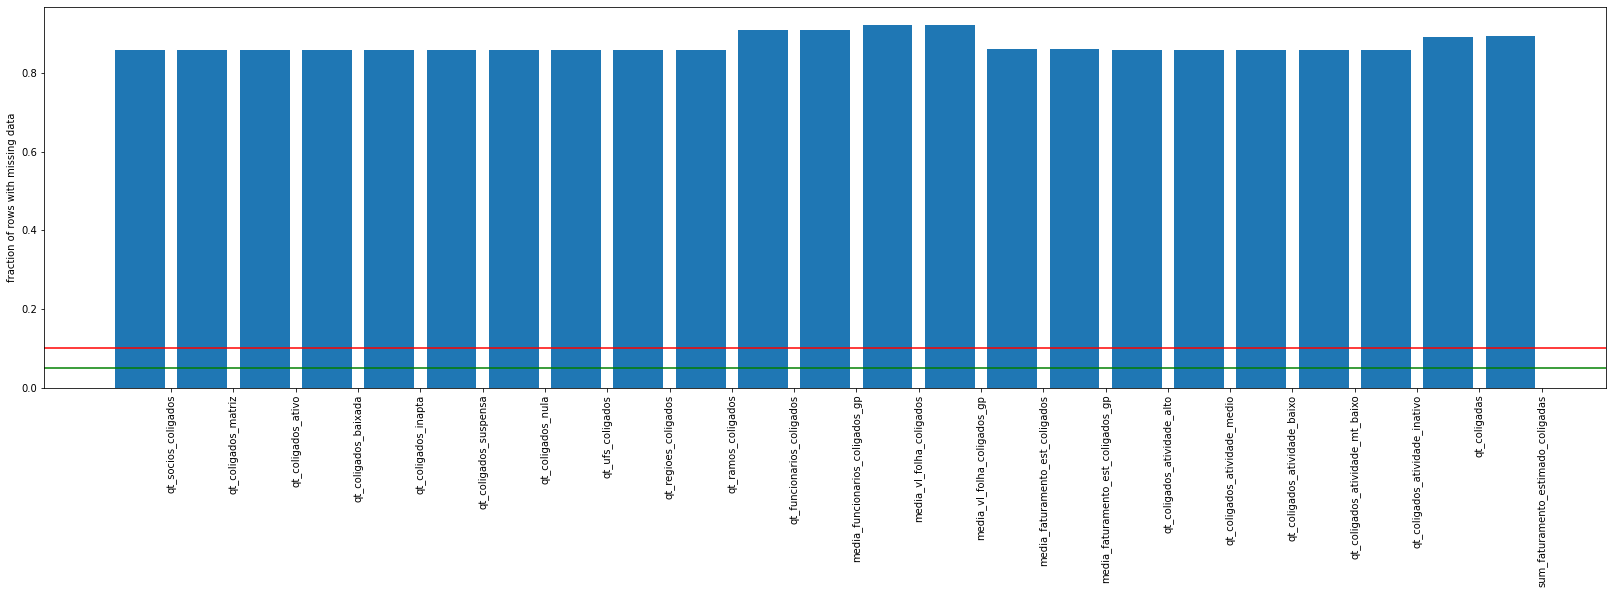

In [ ]:
missing_values_table(mercado[ls_cols_coligadas], True)

In [ ]:
# ver os tipos destas variáveis
mercado[ls_cols_coligadas].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462298 entries, 0 to 462297
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   qt_socios_coligados                 65391 non-null  float64
 1   qt_coligados_matriz                 65391 non-null  float64
 2   qt_coligados_ativo                  65391 non-null  float64
 3   qt_coligados_baixada                65391 non-null  float64
 4   qt_coligados_inapta                 65391 non-null  float64
 5   qt_coligados_suspensa               65391 non-null  float64
 6   qt_coligados_nula                   65391 non-null  float64
 7   qt_ufs_coligados                    65391 non-null  float64
 8   qt_regioes_coligados                65391 non-null  float64
 9   qt_ramos_coligados                  65391 non-null  float64
 10  qt_funcionarios_coligados           42303 non-null  float64
 11  media_funcionarios_coligados_gp     423

In [ ]:
# como todas as variáveis possuem o mesmo dtype, declarar uma única função
# para tratar dados ausentes é suficiente
for col_coligada in ls_cols_coligadas:
    def col_qt_coligadas(df):
        if pd.isnull(df[col_coligada]):
            if df['qt_coligados'] == 0:
                return 0
        else:
            x = df[col_coligada]
            return x

    # aplicando a função
    mercado[col_coligada]    = mercado.apply(col_qt_coligadas, axis=1)

    if portfolio1[col_coligada].isna().sum() > 0:
        portfolio1[col_coligada] = portfolio1.apply(col_qt_coligadas, axis=1)
    
    if portfolio2[col_coligada].isna().sum() > 0:
        portfolio2[col_coligada] = portfolio2.apply(col_qt_coligadas, axis=1)
    
    if portfolio3[col_coligada].isna().sum() > 0:
        portfolio3[col_coligada] = portfolio3.apply(col_qt_coligadas, axis=1)

In [ ]:
# excluir demais colunas relacionadas a coligadas cuja informação já esteja presente em outra coluna
# no conjunto de dados
#ls_cols_coligas_excluir = ['qt_regioes_coligados', 'qt_coligados_nula', 'qt_coligados_sa', 'qt_coligados_me', 'qt_coligados_mei', 'qt_coligados_ltda']
#mercado.drop(ls_cols_coligas_excluir, axis=1, inplace=True)
#portfolio1.drop(ls_cols_coligas_excluir, axis=1, inplace=True)
#portfolio2.drop(ls_cols_coligas_excluir, axis=1, inplace=True)
#portfolio3.drop(ls_cols_coligas_excluir, axis=1, inplace=True)

Abaixo, os valores ausentes são substituídos por zeros porque essas variáveis serão utilizadas na criação de outras variáveis

In [ ]:
# conjunto de dados mercado
mercado['qt_coligados_ativo'].fillna(0, inplace=True)
mercado['qt_coligados_baixada'].fillna(0, inplace=True)
mercado['qt_coligados_inapta'].fillna(0, inplace=True)
mercado['qt_coligados_suspensa'].fillna(0, inplace=True)
mercado['qt_coligados_nula'].fillna(0, inplace=True)
mercado['media_vl_folha_coligados'].fillna(0, inplace=True)
mercado['media_vl_folha_coligados_gp'].fillna(0, inplace=True)
mercado['media_faturamento_est_coligados'].fillna(0, inplace=True)
mercado['media_faturamento_est_coligados_gp'].fillna(0, inplace=True)
mercado['qt_coligados_atividade_baixo'].fillna(0, inplace=True)
mercado['qt_coligados_atividade_mt_baixo'].fillna(0, inplace=True)
mercado['qt_coligados_atividade_inativo'].fillna(0, inplace=True)
mercado['qt_coligadas'].fillna(0, inplace=True)
mercado['sum_faturamento_estimado_coligadas'].fillna(0, inplace=True)

# conjunto de dados portfolio1
portfolio1['qt_coligados_ativo'].fillna(0, inplace=True)
portfolio1['qt_coligados_baixada'].fillna(0, inplace=True)
portfolio1['qt_coligados_inapta'].fillna(0, inplace=True)
portfolio1['qt_coligados_suspensa'].fillna(0, inplace=True)
portfolio1['qt_coligados_nula'].fillna(0, inplace=True)
portfolio1['media_vl_folha_coligados'].fillna(0, inplace=True)
portfolio1['media_vl_folha_coligados_gp'].fillna(0, inplace=True)
portfolio1['media_faturamento_est_coligados'].fillna(0, inplace=True)
portfolio1['media_faturamento_est_coligados_gp'].fillna(0, inplace=True)
portfolio1['qt_coligados_atividade_baixo'].fillna(0, inplace=True)
portfolio1['qt_coligados_atividade_mt_baixo'].fillna(0, inplace=True)
portfolio1['qt_coligados_atividade_inativo'].fillna(0, inplace=True)
portfolio1['qt_coligadas'].fillna(0, inplace=True)
portfolio1['sum_faturamento_estimado_coligadas'].fillna(0, inplace=True)

# conjunto de dados portfolio2
portfolio2['qt_coligados_ativo'].fillna(0, inplace=True)
portfolio2['qt_coligados_baixada'].fillna(0, inplace=True)
portfolio2['qt_coligados_inapta'].fillna(0, inplace=True)
portfolio2['qt_coligados_suspensa'].fillna(0, inplace=True)
portfolio2['qt_coligados_nula'].fillna(0, inplace=True)
portfolio2['media_vl_folha_coligados'].fillna(0, inplace=True)
portfolio2['media_vl_folha_coligados_gp'].fillna(0, inplace=True)
portfolio2['media_faturamento_est_coligados'].fillna(0, inplace=True)
portfolio2['media_faturamento_est_coligados_gp'].fillna(0, inplace=True)
portfolio2['qt_coligados_atividade_baixo'].fillna(0, inplace=True)
portfolio2['qt_coligados_atividade_mt_baixo'].fillna(0, inplace=True)
portfolio2['qt_coligados_atividade_inativo'].fillna(0, inplace=True)
portfolio2['qt_coligadas'].fillna(0, inplace=True)
portfolio2['sum_faturamento_estimado_coligadas'].fillna(0, inplace=True)

# conjunto de dados portfolio3
portfolio3['qt_coligados_ativo'].fillna(0, inplace=True)
portfolio3['qt_coligados_baixada'].fillna(0, inplace=True)
portfolio3['qt_coligados_inapta'].fillna(0, inplace=True)
portfolio3['qt_coligados_suspensa'].fillna(0, inplace=True)
portfolio3['qt_coligados_nula'].fillna(0, inplace=True)
portfolio3['media_vl_folha_coligados'].fillna(0, inplace=True)
portfolio3['media_vl_folha_coligados_gp'].fillna(0, inplace=True)
portfolio3['media_faturamento_est_coligados'].fillna(0, inplace=True)
portfolio3['media_faturamento_est_coligados_gp'].fillna(0, inplace=True)
portfolio3['qt_coligados_atividade_baixo'].fillna(0, inplace=True)
portfolio3['qt_coligados_atividade_mt_baixo'].fillna(0, inplace=True)
portfolio3['qt_coligados_atividade_inativo'].fillna(0, inplace=True)
portfolio3['qt_coligadas'].fillna(0, inplace=True)
portfolio3['sum_faturamento_estimado_coligadas'].fillna(0, inplace=True)

In [ ]:
# excluir colunas referente a coligadas cuja proporção de valores ausentes ultrapasse 10%
ls_cols_coligadas = []

for col in mercado.columns:
    if 'coligad' in col and col in ls_cols_name:
        ls_cols_coligadas.append(col)

df_missing = missing_values_table(mercado[ls_cols_coligadas])
ls_cols_coligada_10 = df_missing[df_missing['% of Total Values'] > 10].index

mercado.drop(ls_cols_coligada_10, axis=1, inplace=True)
portfolio1.drop(ls_cols_coligada_10, axis=1, inplace=True)
portfolio2.drop(ls_cols_coligada_10, axis=1, inplace=True)
portfolio3.drop(ls_cols_coligada_10, axis=1, inplace=True)

Your dataframe has 23 columns. There are 9 columns with missing values.



Substituir valores ausentes por zeros porque as variáveis serão utilizadas na criação de outras variáveis, conforme já mencionado acima.

In [ ]:
mercado['qt_socios_pj_nulos'].fillna(0, inplace=True)
mercado['qt_socios_pj_baixados'].fillna(0, inplace=True)
mercado['qt_socios_pj_ativos'].fillna(0, inplace=True)
mercado['qt_socios_pj_suspensos'].fillna(0, inplace=True)
mercado['qt_socios_pj_inaptos'].fillna(0, inplace=True)

portfolio1['qt_socios_pj_nulos'].fillna(0, inplace=True)
portfolio1['qt_socios_pj_baixados'].fillna(0, inplace=True)
portfolio1['qt_socios_pj_ativos'].fillna(0, inplace=True)
portfolio1['qt_socios_pj_suspensos'].fillna(0, inplace=True)
portfolio1['qt_socios_pj_inaptos'].fillna(0, inplace=True)

portfolio2['qt_socios_pj_nulos'].fillna(0, inplace=True)
portfolio2['qt_socios_pj_baixados'].fillna(0, inplace=True)
portfolio2['qt_socios_pj_ativos'].fillna(0, inplace=True)
portfolio2['qt_socios_pj_suspensos'].fillna(0, inplace=True)
portfolio2['qt_socios_pj_inaptos'].fillna(0, inplace=True)

portfolio3['qt_socios_pj_nulos'].fillna(0, inplace=True)
portfolio3['qt_socios_pj_baixados'].fillna(0, inplace=True)
portfolio3['qt_socios_pj_ativos'].fillna(0, inplace=True)
portfolio3['qt_socios_pj_suspensos'].fillna(0, inplace=True)
portfolio3['qt_socios_pj_inaptos'].fillna(0, inplace=True)

In [ ]:
# lista de colunas com mais de 90% de valores ausentes
df_missing = missing_values_table(mercado)
ls_cols_missin_90 = df_missing[df_missing['% of Total Values'] > 90].index

# remocao dessas colunas dos datasets
mercado.drop(ls_cols_missin_90, axis=1, inplace=True)
portfolio1.drop(ls_cols_missin_90, axis=1, inplace=True)
portfolio2.drop(ls_cols_missin_90, axis=1, inplace=True)
portfolio3.drop(ls_cols_missin_90, axis=1, inplace=True)

Your dataframe has 78 columns. There are 49 columns with missing values.



Gerar as novas variáveis

In [ ]:
# conjunto de dados mercado
mercado['qt_total_socios_pj']      = mercado.qt_socios_pj_ativos + mercado.qt_socios_pj_nulos + mercado.qt_socios_pj_baixados + mercado.qt_socios_pj_suspensos + mercado.qt_socios_pj_inaptos
mercado['prop_sociospj_inativos']  = (mercado.qt_socios_pj_nulos + mercado.qt_socios_pj_baixados + mercado.qt_socios_pj_suspensos + mercado.qt_socios_pj_inaptos) / mercado.qt_total_socios_pj
mercado['prop_sociospj_ativos']    = mercado.qt_socios_pj_ativos / mercado.qt_total_socios_pj
mercado['prop_coligados_inativos'] = (mercado.qt_coligados_baixada + mercado.qt_coligados_inapta + mercado.qt_coligados_suspensa + mercado.qt_coligados_nula) / mercado.qt_coligados
mercado['prop_coligados_ativos']   = mercado.qt_coligados_ativo / mercado.qt_coligados
mercado['media_fat_est_colig_gp_unid_folha_pgto'] = mercado.media_faturamento_est_coligados_gp / mercado.media_vl_folha_coligados_gp
mercado['media_fat_est_colig_unid_folha_pgto']    = mercado.media_faturamento_est_coligados / mercado.media_vl_folha_coligados
mercado['qt_coligados_atividade_ruim'] = mercado.qt_coligados_atividade_baixo + mercado.qt_coligados_atividade_mt_baixo + mercado.qt_coligados_atividade_inativo
mercado['fatur_por_coligada']    = mercado.sum_faturamento_estimado_coligadas / mercado.qt_coligadas
mercado['proporcao_desligados']  = mercado.qt_desligados / mercado.qt_funcionarios
mercado['proporcao_contratados'] = mercado.qt_admitidos / mercado.qt_funcionarios

# conjunto de dados portfolio1
portfolio1['qt_total_socios_pj']      = portfolio1.qt_socios_pj_ativos + portfolio1.qt_socios_pj_nulos + portfolio1.qt_socios_pj_baixados + portfolio1.qt_socios_pj_suspensos + portfolio1.qt_socios_pj_inaptos
portfolio1['prop_sociospj_inativos']  = (portfolio1.qt_socios_pj_nulos + portfolio1.qt_socios_pj_baixados + portfolio1.qt_socios_pj_suspensos + portfolio1.qt_socios_pj_inaptos) / portfolio1.qt_total_socios_pj
portfolio1['prop_sociospj_ativos']    = portfolio1.qt_socios_pj_ativos / portfolio1.qt_total_socios_pj
portfolio1['prop_coligados_inativos'] = (portfolio1.qt_coligados_baixada + portfolio1.qt_coligados_inapta + portfolio1.qt_coligados_suspensa + portfolio1.qt_coligados_nula) / portfolio1.qt_coligados
portfolio1['prop_coligados_ativos']   = portfolio1.qt_coligados_ativo / portfolio1.qt_coligados
portfolio1['media_fat_est_colig_gp_unid_folha_pgto'] = portfolio1.media_faturamento_est_coligados_gp / portfolio1.media_vl_folha_coligados_gp
portfolio1['media_fat_est_colig_unid_folha_pgto']    = portfolio1.media_faturamento_est_coligados / portfolio1.media_vl_folha_coligados
portfolio1['qt_coligados_atividade_ruim'] = portfolio1.qt_coligados_atividade_baixo + portfolio1.qt_coligados_atividade_mt_baixo + portfolio1.qt_coligados_atividade_inativo
portfolio1['fatur_por_coligada']    = portfolio1.sum_faturamento_estimado_coligadas / portfolio1.qt_coligadas
portfolio1['proporcao_desligados']  = portfolio1.qt_desligados / portfolio1.qt_funcionarios
portfolio1['proporcao_contratados'] = portfolio1.qt_admitidos / portfolio1.qt_funcionarios

# conjunto de dados portfolio2
portfolio2['qt_total_socios_pj']      = portfolio2.qt_socios_pj_ativos + portfolio2.qt_socios_pj_nulos + portfolio2.qt_socios_pj_baixados + portfolio2.qt_socios_pj_suspensos + portfolio2.qt_socios_pj_inaptos
portfolio2['prop_sociospj_inativos']  = (portfolio2.qt_socios_pj_nulos + portfolio2.qt_socios_pj_baixados + portfolio2.qt_socios_pj_suspensos + portfolio2.qt_socios_pj_inaptos) / portfolio2.qt_total_socios_pj
portfolio2['prop_sociospj_ativos']    = portfolio2.qt_socios_pj_ativos / portfolio2.qt_total_socios_pj
portfolio2['prop_coligados_inativos'] = (portfolio2.qt_coligados_baixada + portfolio2.qt_coligados_inapta + portfolio2.qt_coligados_suspensa + portfolio2.qt_coligados_nula) / portfolio2.qt_coligados
portfolio2['prop_coligados_ativos']   = portfolio2.qt_coligados_ativo / portfolio2.qt_coligados
portfolio2['media_fat_est_colig_gp_unid_folha_pgto'] = portfolio2.media_faturamento_est_coligados_gp / portfolio2.media_vl_folha_coligados_gp
portfolio2['media_fat_est_colig_unid_folha_pgto']    = portfolio2.media_faturamento_est_coligados / portfolio2.media_vl_folha_coligados
portfolio2['qt_coligados_atividade_ruim'] = portfolio2.qt_coligados_atividade_baixo + portfolio2.qt_coligados_atividade_mt_baixo + portfolio2.qt_coligados_atividade_inativo
portfolio2['fatur_por_coligada']    = portfolio2.sum_faturamento_estimado_coligadas / portfolio2.qt_coligadas
portfolio2['proporcao_desligados']  = portfolio2.qt_desligados / portfolio2.qt_funcionarios
portfolio2['proporcao_contratados'] = portfolio2.qt_admitidos / portfolio2.qt_funcionarios

# conjunto de dados portfolio3
portfolio3['qt_total_socios_pj']      = portfolio3.qt_socios_pj_ativos + portfolio3.qt_socios_pj_nulos + portfolio3.qt_socios_pj_baixados + portfolio3.qt_socios_pj_suspensos + portfolio3.qt_socios_pj_inaptos
portfolio3['prop_sociospj_inativos']  = (portfolio3.qt_socios_pj_nulos + portfolio3.qt_socios_pj_baixados + portfolio3.qt_socios_pj_suspensos + portfolio3.qt_socios_pj_inaptos) / portfolio3.qt_total_socios_pj
portfolio3['prop_sociospj_ativos']    = portfolio3.qt_socios_pj_ativos / portfolio3.qt_total_socios_pj
portfolio3['prop_coligados_inativos'] = (portfolio3.qt_coligados_baixada + portfolio3.qt_coligados_inapta + portfolio3.qt_coligados_suspensa + portfolio3.qt_coligados_nula) / portfolio3.qt_coligados
portfolio3['prop_coligados_ativos']   = portfolio3.qt_coligados_ativo / portfolio3.qt_coligados
portfolio3['media_fat_est_colig_gp_unid_folha_pgto'] = portfolio3.media_faturamento_est_coligados_gp / portfolio3.media_vl_folha_coligados_gp
portfolio3['media_fat_est_colig_unid_folha_pgto']    = portfolio3.media_faturamento_est_coligados / portfolio3.media_vl_folha_coligados
portfolio3['qt_coligados_atividade_ruim'] = portfolio3.qt_coligados_atividade_baixo + portfolio3.qt_coligados_atividade_mt_baixo + portfolio3.qt_coligados_atividade_inativo
portfolio3['fatur_por_coligada']    = portfolio3.sum_faturamento_estimado_coligadas / portfolio3.qt_coligadas
portfolio3['proporcao_desligados']  = portfolio3.qt_desligados / portfolio3.qt_funcionarios
portfolio3['proporcao_contratados'] = portfolio3.qt_admitidos / portfolio3.qt_funcionarios

Agora que as novas variáveis foram criadas, excluir as variáveis identificadas como desnecessários no início deste trabalho

In [ ]:
ls_cols_excluir = ['qt_socios_pj_ativos', 'qt_socios_pj_nulos', 'qt_socios_pj_baixados', 'qt_socios_pj_suspensos', 'qt_socios_pj_inaptos', 
                   'qt_coligados_baixada', 'qt_coligados_inapta', 'qt_coligados_suspensa', 'qt_coligados_nula', 'qt_coligados_atividade_baixo', 
                   'qt_coligados_atividade_mt_baixo', 'qt_desligados', 'qt_admitidos', 'qt_socios_pf', 'qt_socios_pj', 'de_faixa_faturamento_estimado', 
                   'vl_faturamento_estimado_aux', 'fl_optante_simples', 'fl_optante_simei', 'qt_coligados_ativo']

mercado.drop(ls_cols_excluir, axis=1, inplace=True)
portfolio1.drop(ls_cols_excluir, axis=1, inplace=True)
portfolio2.drop(ls_cols_excluir, axis=1, inplace=True)
portfolio3.drop(ls_cols_excluir, axis=1, inplace=True)

Verificar o que restou de variáveis com registros ausentes

Your dataframe has 59 columns. There are 41 columns with missing values.



,Missing Values,% of Total Values
prop_sociospj_ativos,457754,99.0
prop_sociospj_inativos,457754,99.0
fatur_por_coligada,412067,89.1
media_fat_est_colig_unid_folha_pgto,397775,86.0
media_fat_est_colig_gp_unid_folha_pgto,397775,86.0
tx_crescimento_12meses,388410,84.0
tx_crescimento_24meses,388284,84.0
total,386356,83.6
media_meses_servicos,386037,83.5
prop_coligados_ativos,369719,80.0


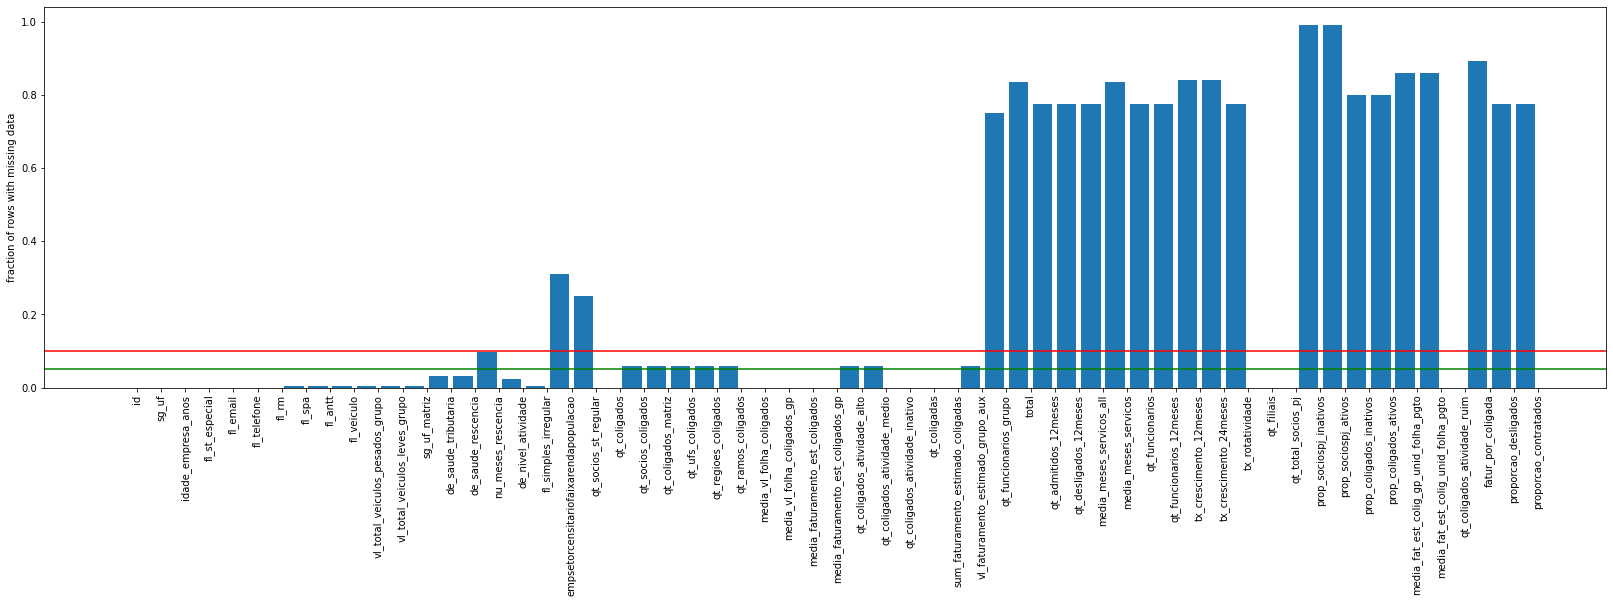

In [ ]:
missing_values_table(mercado, True)

In [ ]:
# excluir colunas cuja proporção de valores ausentes ultrapasse 10%
df_missing = missing_values_table(mercado)
ls_cols_10 = df_missing[df_missing['% of Total Values'] > 10].index

mercado.drop(ls_cols_10, axis=1, inplace=True)
portfolio1.drop(ls_cols_10, axis=1, inplace=True)
portfolio2.drop(ls_cols_10, axis=1, inplace=True)
portfolio3.drop(ls_cols_10, axis=1, inplace=True)

Your dataframe has 59 columns. There are 41 columns with missing values.



Your dataframe has 37 columns. There are 19 columns with missing values.



,Missing Values,% of Total Values
nu_meses_rescencia,45276,9.8
vl_faturamento_estimado_grupo_aux,27513,6.0
qt_socios_coligados,27188,5.9
qt_coligados_atividade_medio,27188,5.9
qt_coligados_atividade_alto,27188,5.9
qt_ramos_coligados,27188,5.9
qt_regioes_coligados,27188,5.9
qt_ufs_coligados,27188,5.9
qt_coligados_matriz,27188,5.9
de_saude_tributaria,14851,3.2


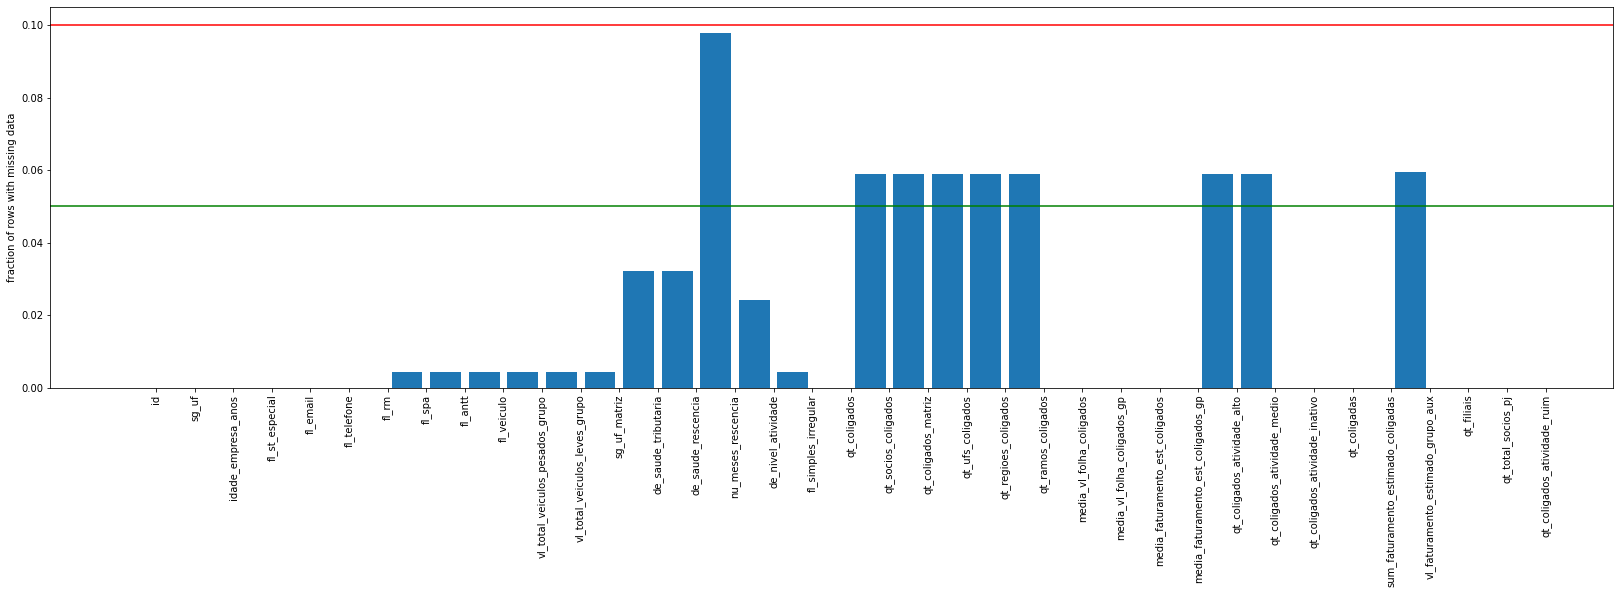

In [ ]:
missing_values_table(mercado, True)

In [ ]:
# gerar lista de colunas numéricas com valores ausentes para substituir estes valores por zero
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
ls_var_numerica = list(mercado.select_dtypes(include=numerics).columns)

for col in ls_var_numerica:
    mercado[col].fillna(0, inplace=True)
    portfolio1[col].fillna(0, inplace=True)
    portfolio2[col].fillna(0, inplace=True)
    portfolio3[col].fillna(0, inplace=True)

In [ ]:
# identificar os tipos de dados das colunas ainda com valores ausentes
df_missing = missing_values_table(mercado)
ls_cols_missing = df_missing.index

mercado[ls_cols_missing].info()

Your dataframe has 37 columns. There are 8 columns with missing values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462298 entries, 0 to 462297
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   de_saude_tributaria   447447 non-null  object
 1   de_saude_rescencia    447447 non-null  object
 2   de_nivel_atividade    451130 non-null  object
 3   sg_uf_matriz          460359 non-null  object
 4   fl_spa                460371 non-null  object
 5   fl_antt               460371 non-null  object
 6   fl_veiculo            460371 non-null  object
 7   fl_simples_irregular  460371 non-null  object
dtypes: object(8)
memory usage: 28.2+ MB


In [ ]:
# como os valores ausentes restantes estão em colunas com dados do tipo object
# a estratégia adotada é substituir os valores ausentes pelos mais frequentes

# aplicar aos conjuntos de dados
for col in ls_cols_missing:
    mais_frequente = mercado[col].mode()
    mercado[col].fillna(mais_frequente[0], inplace=True)

    if portfolio1[col].isna().sum() > 0:
        portfolio1[col].fillna(mais_frequente[0], inplace=True)

    if portfolio2[col].isna().sum() > 0:
        portfolio2[col].fillna(mais_frequente[0], inplace=True)

    if portfolio3[col].isna().sum() > 0:
        portfolio3[col].fillna(mais_frequente[0], inplace=True)

Verificar se todos os conjuntos de dados ainda possuem dados ausentes

In [ ]:
missing_values_table(mercado)

Your dataframe has 37 columns. There are 0 columns with missing values.



,Missing Values,% of Total Values


In [ ]:
missing_values_table(portfolio1)

Your dataframe has 37 columns. There are 0 columns with missing values.



,Missing Values,% of Total Values


In [ ]:
missing_values_table(portfolio2)

Your dataframe has 37 columns. There are 0 columns with missing values.



,Missing Values,% of Total Values


In [ ]:
missing_values_table(portfolio3)

Your dataframe has 37 columns. There are 0 columns with missing values.



,Missing Values,% of Total Values


Para concluir esta etapa, optei por fazer aqui busca por colunas cujos valores são constantes.
A exclusão dessas colunas é interessante porque elas não acrescentam informação ao modelo de machine learning.

In [ ]:
# Verificar a existência de colunas com valores constantes
valor_constante = [
    var for var in mercado.columns if mercado[var].dtype != 'O'
    and len(mercado[var].unique()) == 1
]

if len(valor_constante) > 0:
    print(len(valor_constante))
    mercado.drop(valor_constante, axis=1, inplace=True)
    portfolio1.drop(valor_constante, axis=1, inplace=True)
    portfolio2.drop(valor_constante, axis=1, inplace=True)
    portfolio3.drop(valor_constante, axis=1, inplace=True)

4


In [ ]:
# variáveis excluídas
valor_constante

['qt_coligados_atividade_alto',
 'qt_coligados_atividade_medio',
 'qt_coligados_atividade_inativo',
 'qt_coligados_atividade_ruim']

In [ ]:
# procedimento análogo será adotado com colunas de tipo de dados numérico, removendo colunas
# cuja consntância chega a 98%

# variáveis numéricos
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(mercado.select_dtypes(include=numerics).columns)

from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(
    threshold=0.02)  # 0.02 indica 98% das observações

sel.fit(mercado[numerical_vars])

# selecioar colunas a serem mantidas
features_to_keep = mercado[numerical_vars].columns[sel.get_support()]

# list de colunas a excluir
cols_a_excluir = set(numerical_vars) - set(features_to_keep)

# executar a exclusão
mercado.drop(cols_a_excluir, axis=1, inplace=True)
portfolio1.drop(cols_a_excluir, axis=1, inplace=True)
portfolio2.drop(cols_a_excluir, axis=1, inplace=True)
portfolio3.drop(cols_a_excluir, axis=1, inplace=True)

print('Colunas removidas: ', cols_a_excluir)

Colunas removidas:  set()


Amostra do resultado final

In [ ]:
mercado.head()

,id,sg_uf,idade_empresa_anos,fl_st_especial,fl_email,fl_telefone,fl_rm,fl_spa,fl_antt,fl_veiculo,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,fl_simples_irregular,qt_coligados,qt_socios_coligados,qt_coligados_matriz,qt_ufs_coligados,qt_regioes_coligados,qt_ramos_coligados,media_vl_folha_coligados,media_vl_folha_coligados_gp,media_faturamento_est_coligados,media_faturamento_est_coligados_gp,qt_coligadas,sum_faturamento_estimado_coligadas,vl_faturamento_estimado_grupo_aux,qt_filiais,qt_total_socios_pj
0,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...,RN,14.457534,False,True,True,SIM,False,False,False,0.0,0.0,RN,VERDE,ACIMA DE 1 ANO,23.0,ALTA,False,6.0,8.0,6.0,2.0,1.0,5.0,2343978.0,2343978.0,3.634907e+06,3.669907e+06,6.0,21809443.0,3132172.8,0,0.0
1,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c4...,PI,1.463014,False,True,True,SIM,False,False,False,0.0,0.0,PI,CINZA,ATE 1 ANO,9.0,BAIXA,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,210000.0,0,0.0
2,4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02...,AM,7.093151,False,False,True,SIM,False,False,False,0.0,0.0,AM,AMARELO,ACIMA DE 1 ANO,26.0,MEDIA,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,50000.0,0,0.0
3,3348900fe63216a439d2e5238c79ddd46ede454df7b9d8...,AM,6.512329,False,True,True,SIM,False,False,False,0.0,0.0,AM,AMARELO,ACIMA DE 1 ANO,26.0,MEDIA,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,210000.0,0,0.0
4,1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4...,RN,3.200000,False,True,True,SIM,False,False,False,0.0,0.0,RN,VERDE,ACIMA DE 1 ANO,27.0,ALTA,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,210000.0,0,0.0


In [ ]:
mercado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462298 entries, 0 to 462297
Data columns (total 33 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   id                                  462298 non-null  object 
 1   sg_uf                               462298 non-null  object 
 2   idade_empresa_anos                  462298 non-null  float64
 3   fl_st_especial                      462298 non-null  bool   
 4   fl_email                            462298 non-null  bool   
 5   fl_telefone                         462298 non-null  bool   
 6   fl_rm                               462298 non-null  object 
 7   fl_spa                              462298 non-null  bool   
 8   fl_antt                             462298 non-null  bool   
 9   fl_veiculo                          462298 non-null  bool   
 10  vl_total_veiculos_pesados_grupo     462298 non-null  float64
 11  vl_total_veiculos_leves_gr

Identificar as variáveis que possuem até 2 valores distintos, para transformá-las em variáveis booleanas

In [ ]:
# lista com valores passíveis de serem booleanos
ls_cols_bool = []

for col in mercado.columns:
    if mercado[col].dtype == 'O':
        if mercado[col].nunique() == 2:
            ls_cols_bool.append(col)

ls_cols_bool

['fl_rm']

In [ ]:
# apenas uma coluna com até 2 valores distintos, esses valores são
mercado.fl_rm.unique()

array(['SIM', 'NAO'], dtype=object)

In [ ]:
# Transformar esta coluna em boolean
mercado['fl_rm']    = mercado['fl_rm'].map({'SIM': True, 'NAO': False})
portfolio1['fl_rm'] = portfolio1['fl_rm'].map({'SIM': True, 'NAO': False})
portfolio2['fl_rm'] = portfolio2['fl_rm'].map({'SIM': True, 'NAO': False})
portfolio3['fl_rm'] = portfolio3['fl_rm'].map({'SIM': True, 'NAO': False})

# 2. Análise Exploratória dos Dados

Variáveis booleanas

Text(0.5, 1.0, 'fl_st_especial')

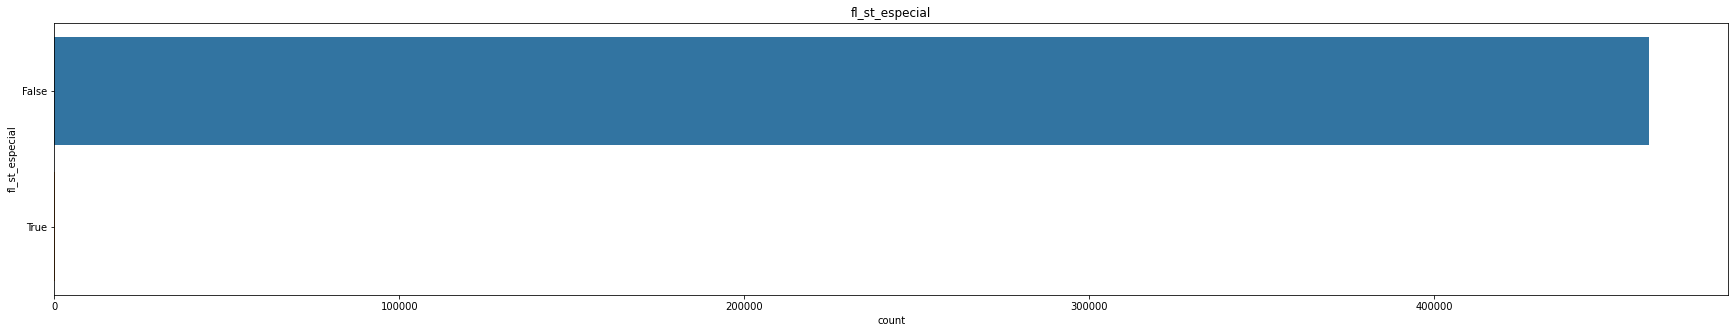

In [ ]:
plt.figure(figsize=(30,5))
sns.countplot(data = mercado, y = 'fl_st_especial').set_title('fl_st_especial')

Text(0.5, 1.0, 'fl_email')

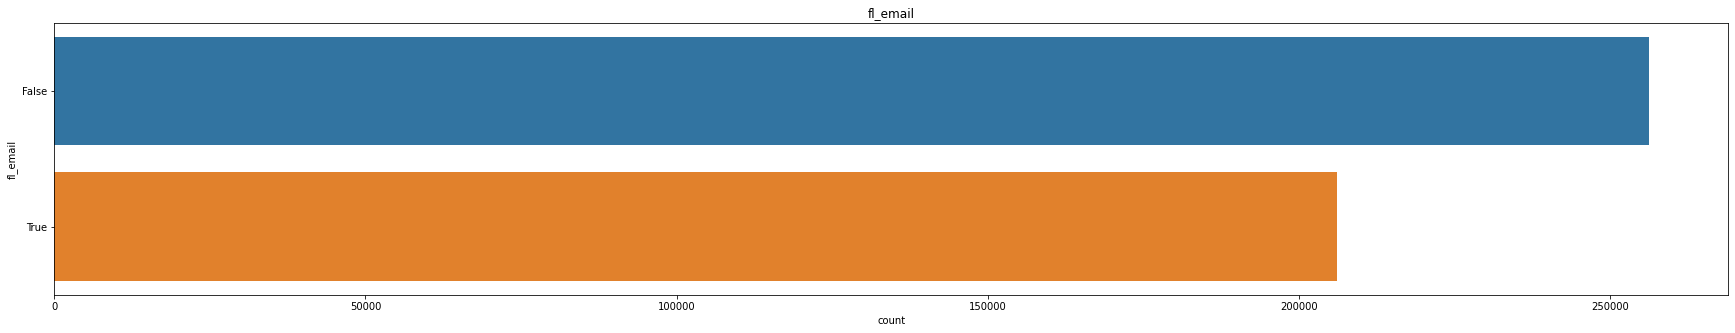

In [ ]:
plt.figure(figsize=(30,5))
sns.countplot(data = mercado, y = 'fl_email').set_title('fl_email')

Text(0.5, 1.0, 'fl_telefone')

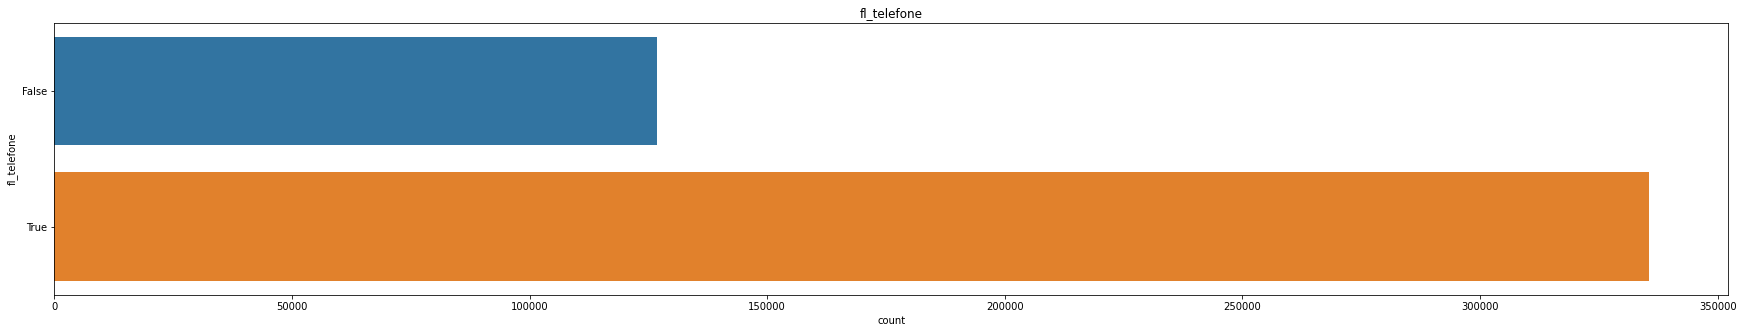

In [ ]:
plt.figure(figsize=(30,5))
sns.countplot(data = mercado, y = 'fl_telefone').set_title('fl_telefone')

Text(0.5, 1.0, 'fl_spa')

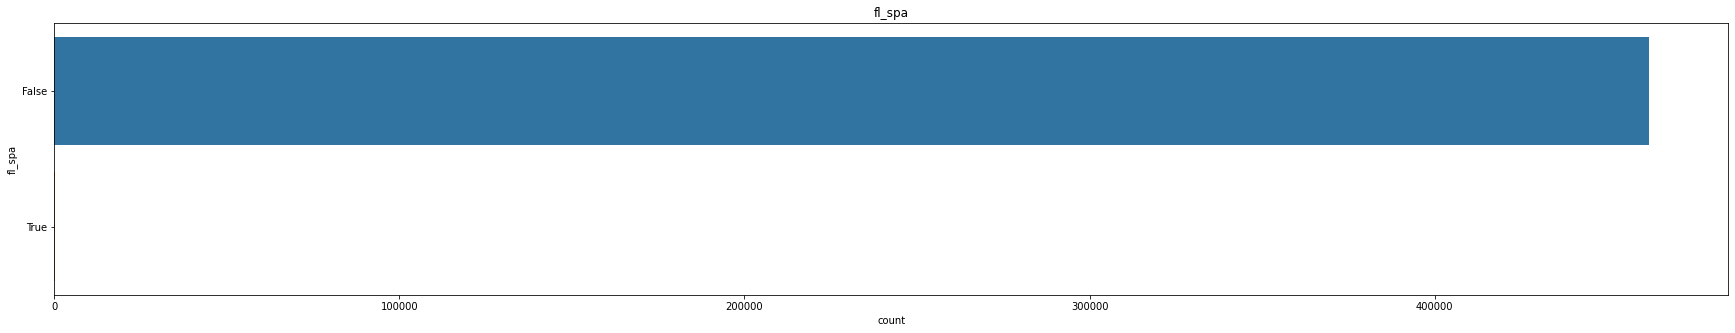

In [ ]:
plt.figure(figsize=(30,5))
sns.countplot(data = mercado, y = 'fl_spa').set_title('fl_spa')

Text(0.5, 1.0, 'fl_antt')

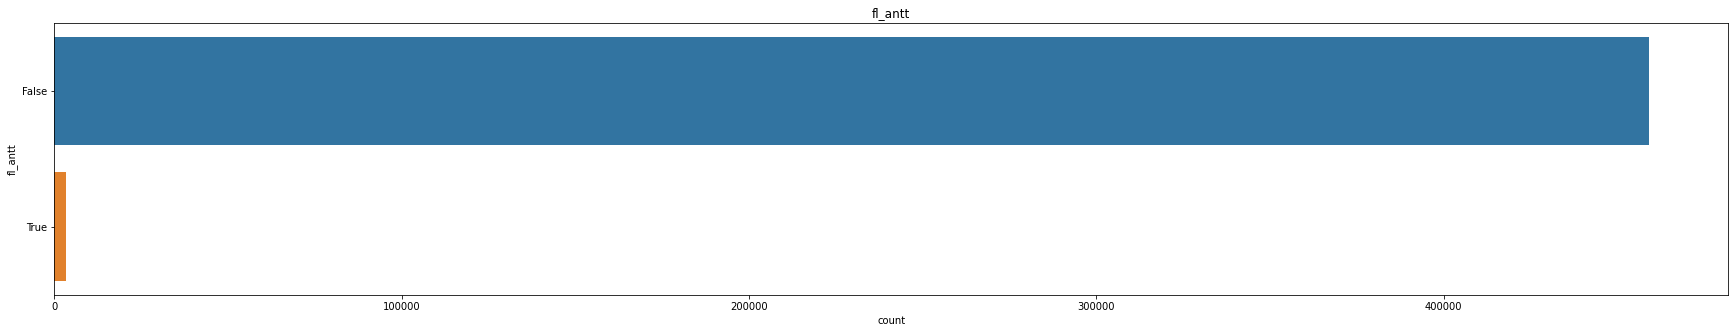

In [ ]:
plt.figure(figsize=(30,5))
sns.countplot(data = mercado, y = 'fl_antt').set_title('fl_antt')

Text(0.5, 1.0, 'fl_simples_irregular')

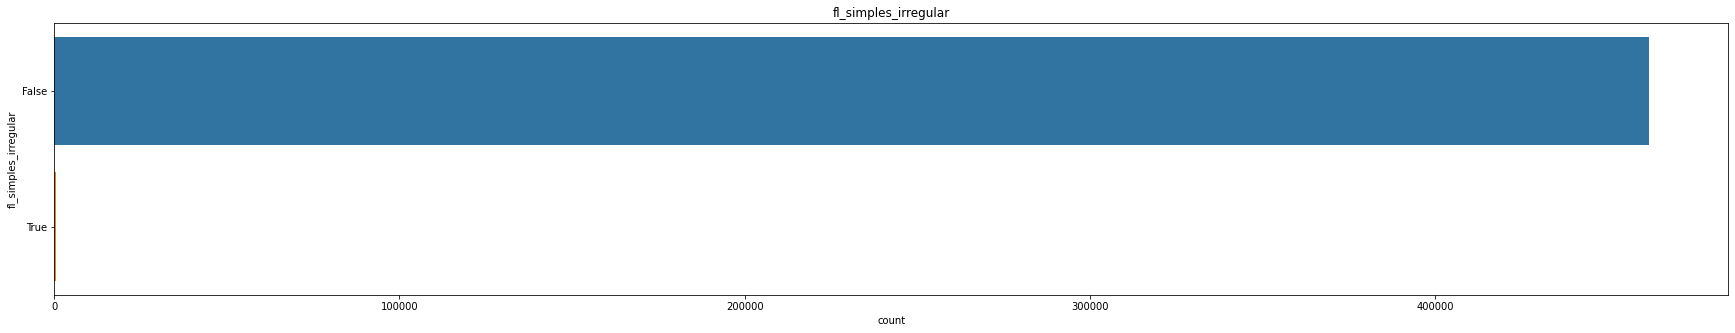

In [ ]:
plt.figure(figsize=(30,5))
sns.countplot(data = mercado, y = 'fl_simples_irregular').set_title('fl_simples_irregular')

Text(0.5, 1.0, 'fl_rm')

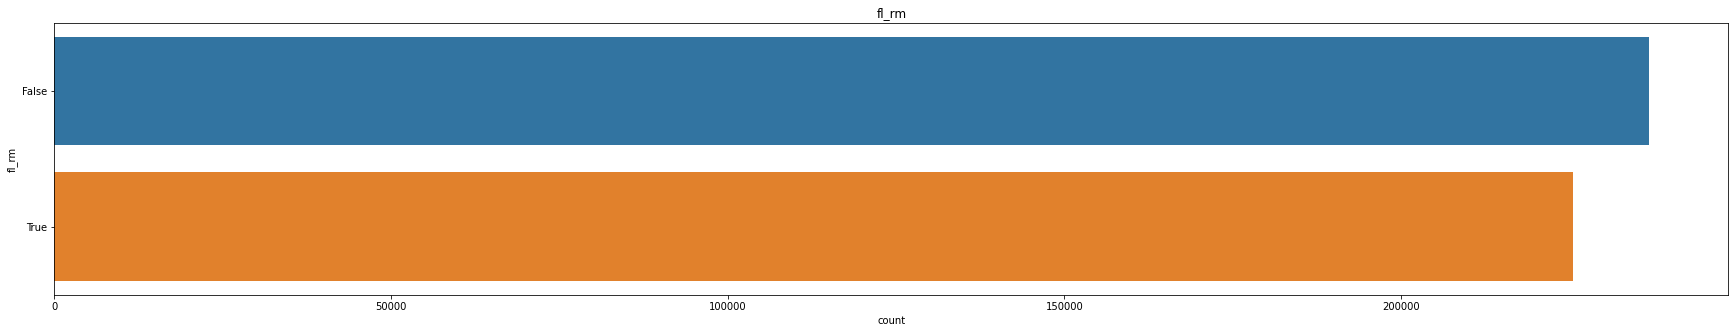

In [ ]:
plt.figure(figsize=(30,5))
sns.countplot(data = mercado, y = 'fl_rm').set_title('fl_rm')

Três variáveis apresentaram valores aproximadamente constantes, abaixo, chequei a proporção visando decidir pela manutenção ou não das variáveis: fl_st_especial, fl_spa e fl_simples_irregular

In [ ]:
# Variável fl_st_especial
x = mercado.fl_st_especial.value_counts()
x[0]/(x[0] + x[1]) * 100

99.98529087298668

In [ ]:
# Variável fl_spa
x = mercado.fl_spa.value_counts()
x[0]/(x[0] + x[1]) * 100

99.93943300641578

In [ ]:
# Variável fl_simples_irregular
x = mercado.fl_simples_irregular.value_counts()
x[0]/(x[0] + x[1]) * 100

99.92623805424206

In [ ]:
# variável fl_antt
x = mercado.fl_antt.value_counts()
x[0]/(x[0] + x[1]) * 100

99.29136617506457

A conclusão é que essas variáveis são praticamente constantes, portanto, podem ser excluídas

In [ ]:
ls_cols_excluir = ['fl_st_especial', 'fl_spa', 'fl_simples_irregular', 'fl_antt']

mercado.drop(ls_cols_excluir, axis=1, inplace=True)
portfolio1.drop(ls_cols_excluir, axis=1, inplace=True)
portfolio2.drop(ls_cols_excluir, axis=1, inplace=True)
portfolio3.drop(ls_cols_excluir, axis=1, inplace=True)

Variáveis categóricas

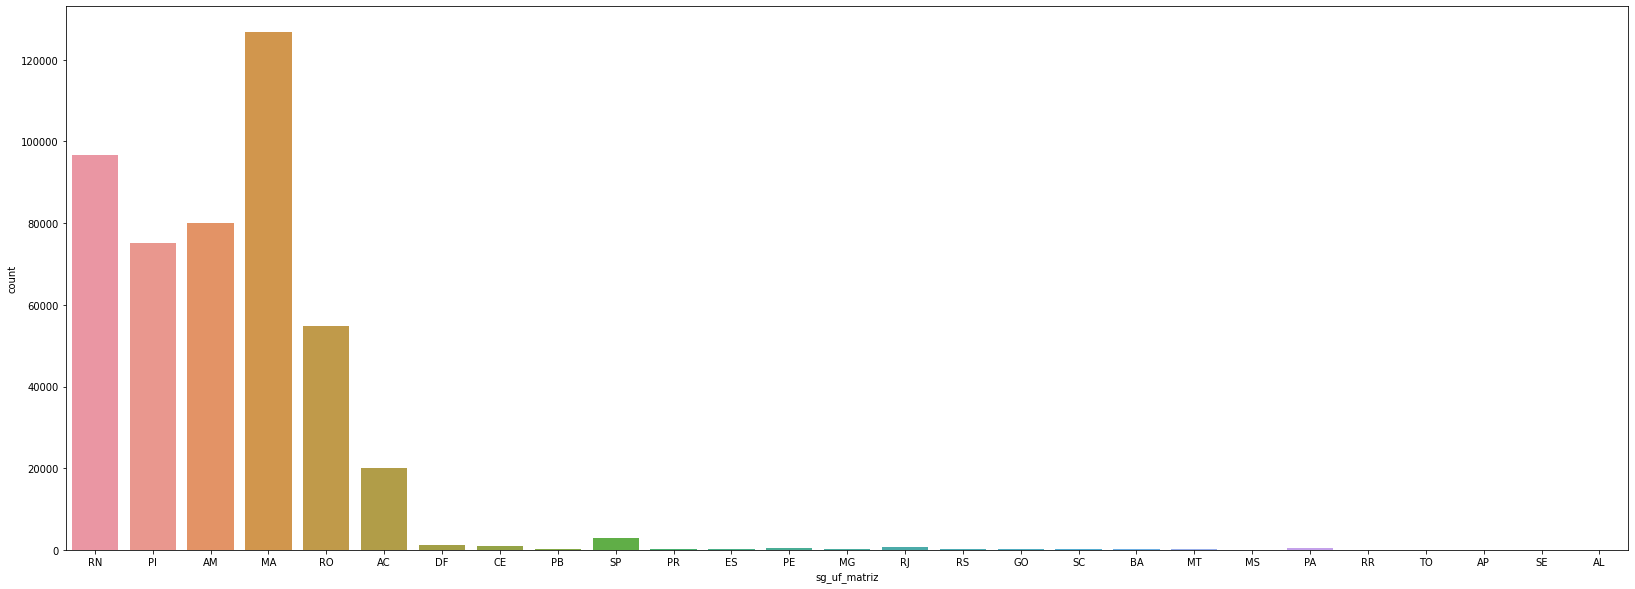

In [ ]:
plt.figure(figsize=(28,10))
ax = sns.countplot(mercado['sg_uf_matriz'])

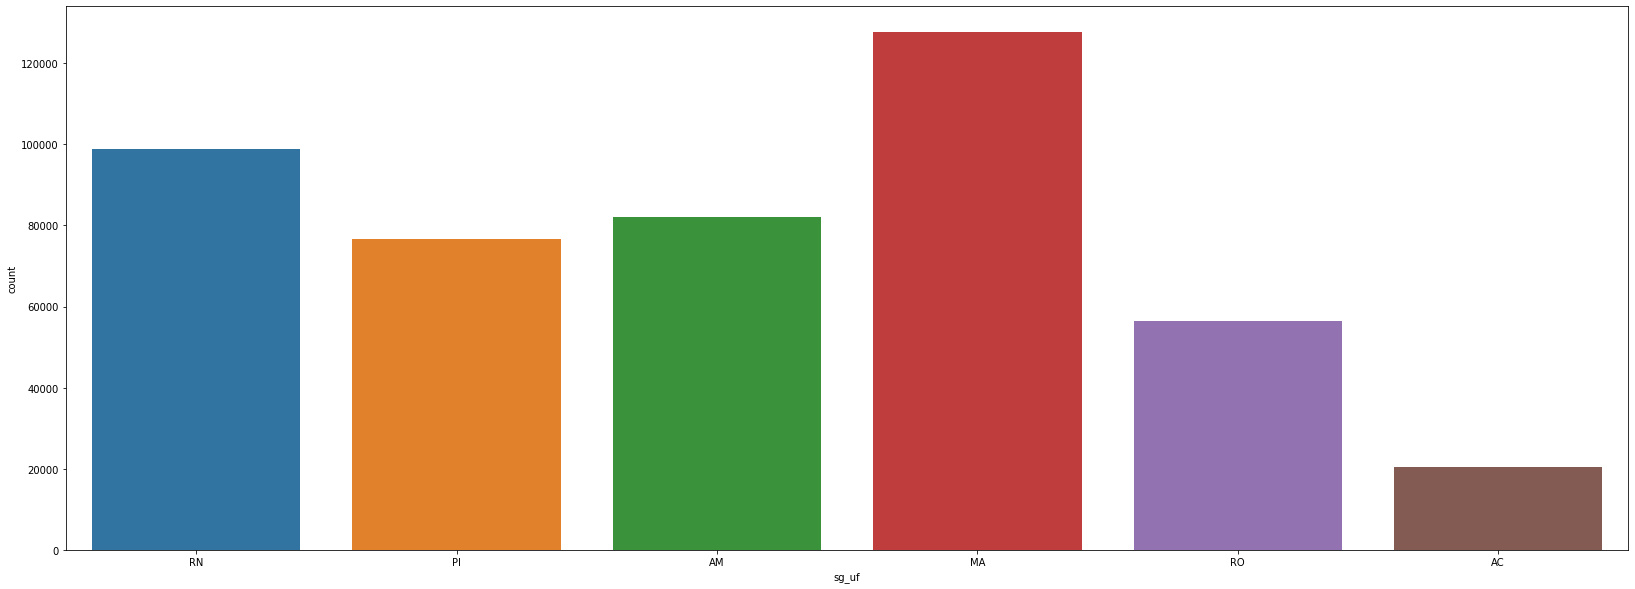

In [ ]:
plt.figure(figsize=(28,10))
ax = sns.countplot(mercado['sg_uf'])

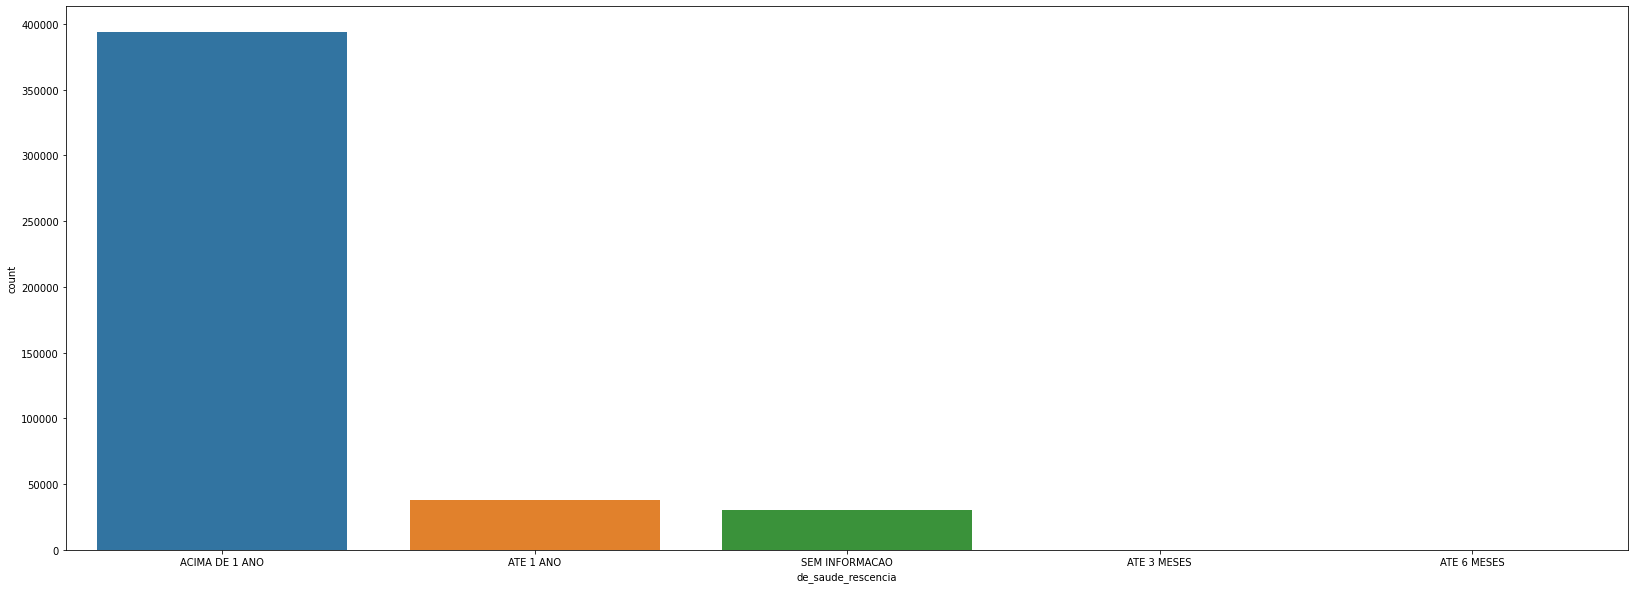

In [ ]:
plt.figure(figsize=(28,10))
ax = sns.countplot(mercado['de_saude_rescencia'])

A participação dos valores `ATE 3 MESES` e `ATE 6 MESES` é muito pequena em relação aos demais. Faz-se a opção por unificá-las no valor `ATE 6 MESES`.

In [ ]:
mercado['de_saude_rescencia']    = mercado['de_saude_rescencia'].replace(to_replace = {'ATE 3 MESES': 'ATE 6 MESES'})
portfolio1['de_saude_rescencia'] = portfolio1['de_saude_rescencia'].replace(to_replace = {'ATE 3 MESES': 'ATE 6 MESES'})
portfolio2['de_saude_rescencia'] = portfolio2['de_saude_rescencia'].replace(to_replace = {'ATE 3 MESES': 'ATE 6 MESES'})
portfolio3['de_saude_rescencia'] = portfolio3['de_saude_rescencia'].replace(to_replace = {'ATE 3 MESES': 'ATE 6 MESES'})

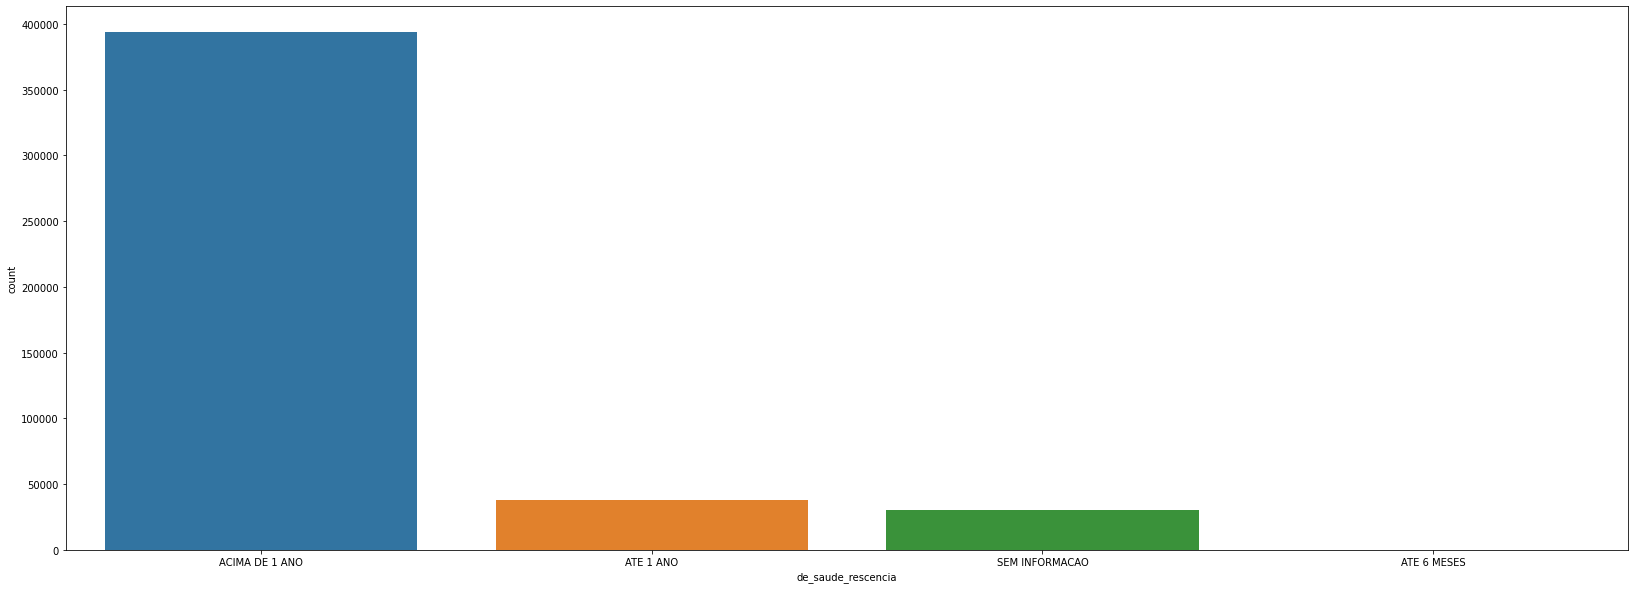

In [ ]:
# visualizar a diferença
plt.figure(figsize=(28,10))
ax = sns.countplot(mercado['de_saude_rescencia'])

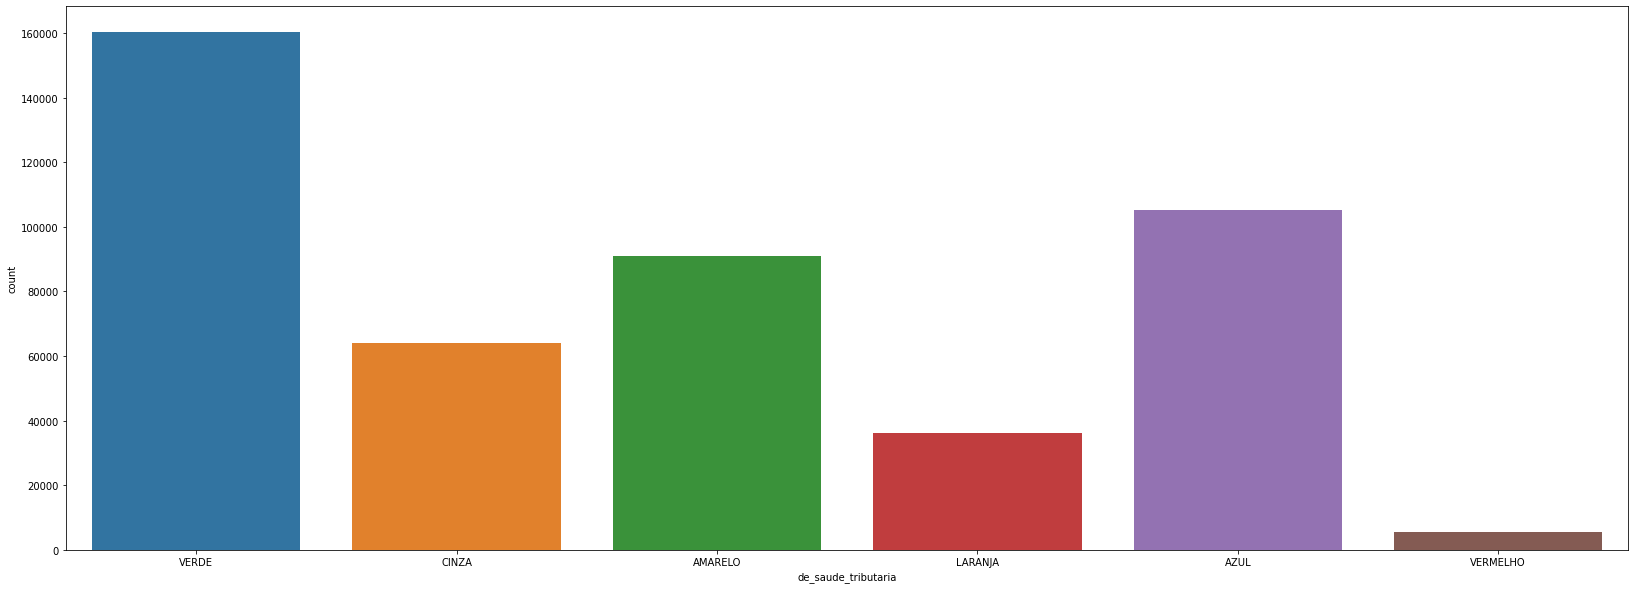

In [ ]:
plt.figure(figsize=(28,10))
ax = sns.countplot(mercado['de_saude_tributaria'])

A participação do valor `MUITO BAIXA`em `de_nivel_atividade`é praticamente constante. 

In [ ]:
mercado[mercado['de_nivel_atividade'] == 'MUITO BAIXA'].shape[0] / mercado.shape[0] * 100

1.0504047173035573

In [ ]:
# Substituir o valor 'MUITO BAIXA' por 'BAIXA'

mercado['de_nivel_atividade']    = mercado['de_nivel_atividade'].replace(to_replace = {'MUITO BAIXA': 'BAIXA'})
portfolio1['de_nivel_atividade'] = portfolio1['de_nivel_atividade'].replace(to_replace = {'MUITO BAIXA': 'BAIXA'})
portfolio2['de_nivel_atividade'] = portfolio2['de_nivel_atividade'].replace(to_replace = {'MUITO BAIXA': 'BAIXA'})
portfolio3['de_nivel_atividade'] = portfolio3['de_nivel_atividade'].replace(to_replace = {'MUITO BAIXA': 'BAIXA'})

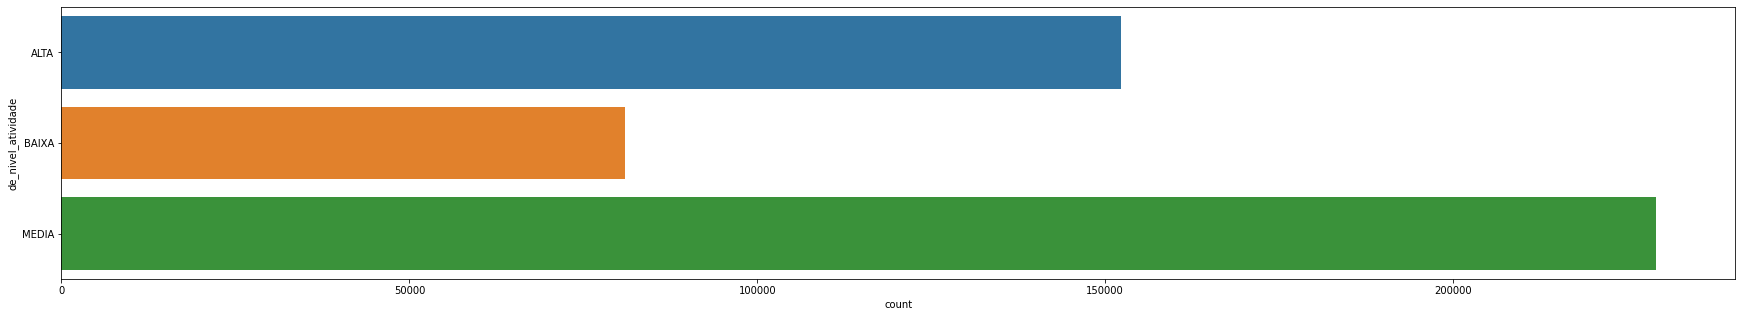

In [ ]:
# visualizar o resultado

plt.figure(figsize=(30, 5))
ax = sns.countplot(y = mercado['de_nivel_atividade'])

Variáveis numéricas

As variáveis numéricas restantes versam, em sua maioria, sobre coligadas.

Para variáveis numéricas, identificar a correlação entre as variáveis

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
ls_var_numerica = list(mercado.select_dtypes(include=numerics).columns)

# visualizar a correlação
corr = mercado[ls_var_numerica].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(3)

,idade_empresa_anos,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,nu_meses_rescencia,qt_coligados,qt_socios_coligados,qt_coligados_matriz,qt_ufs_coligados,qt_regioes_coligados,qt_ramos_coligados,media_vl_folha_coligados,media_vl_folha_coligados_gp,media_faturamento_est_coligados,media_faturamento_est_coligados_gp,qt_coligadas,sum_faturamento_estimado_coligadas,vl_faturamento_estimado_grupo_aux,qt_filiais,qt_total_socios_pj
idade_empresa_anos,1.000,0.043,0.053,0.327,0.015,0.005,0.010,0.059,0.081,0.054,0.028,0.013,0.016,0.014,0.011,0.001,0.043,0.058,0.003
vl_total_veiculos_pesados_grupo,0.043,1.000,0.643,0.012,0.304,0.410,0.299,0.177,0.198,0.486,0.146,0.050,0.106,0.092,-0.003,-0.000,0.629,0.676,0.026
vl_total_veiculos_leves_grupo,0.053,0.643,1.000,0.014,0.119,0.162,0.118,0.073,0.080,0.207,0.064,0.022,0.077,0.063,-0.003,-0.000,0.362,0.672,0.000
nu_meses_rescencia,0.327,0.012,0.014,1.000,0.016,0.003,0.005,0.029,0.040,0.017,0.005,0.003,0.003,0.002,0.007,-0.003,0.012,0.024,-0.002
qt_coligados,0.015,0.304,0.119,0.016,1.000,0.932,0.999,0.503,0.414,0.566,0.148,0.079,0.096,0.086,0.512,0.127,0.297,0.212,0.248
qt_socios_coligados,0.005,0.410,0.162,0.003,0.932,1.000,0.933,0.430,0.347,0.552,0.142,0.057,0.101,0.087,0.432,0.090,0.373,0.270,0.209
qt_coligados_matriz,0.010,0.299,0.118,0.005,0.999,0.933,1.000,0.501,0.411,0.562,0.147,0.079,0.096,0.085,0.514,0.128,0.293,0.209,0.248
qt_ufs_coligados,0.059,0.177,0.073,0.029,0.503,0.430,0.501,1.000,0.900,0.709,0.207,0.092,0.121,0.116,0.277,0.091,0.241,0.192,0.377
qt_regioes_coligados,0.081,0.198,0.080,0.040,0.414,0.347,0.411,0.900,1.000,0.711,0.225,0.093,0.131,0.126,0.241,0.062,0.270,0.225,0.342
qt_ramos_coligados,0.054,0.486,0.207,0.017,0.566,0.552,0.562,0.709,0.711,1.000,0.247,0.101,0.209,0.189,0.213,0.053,0.524,0.378,0.333


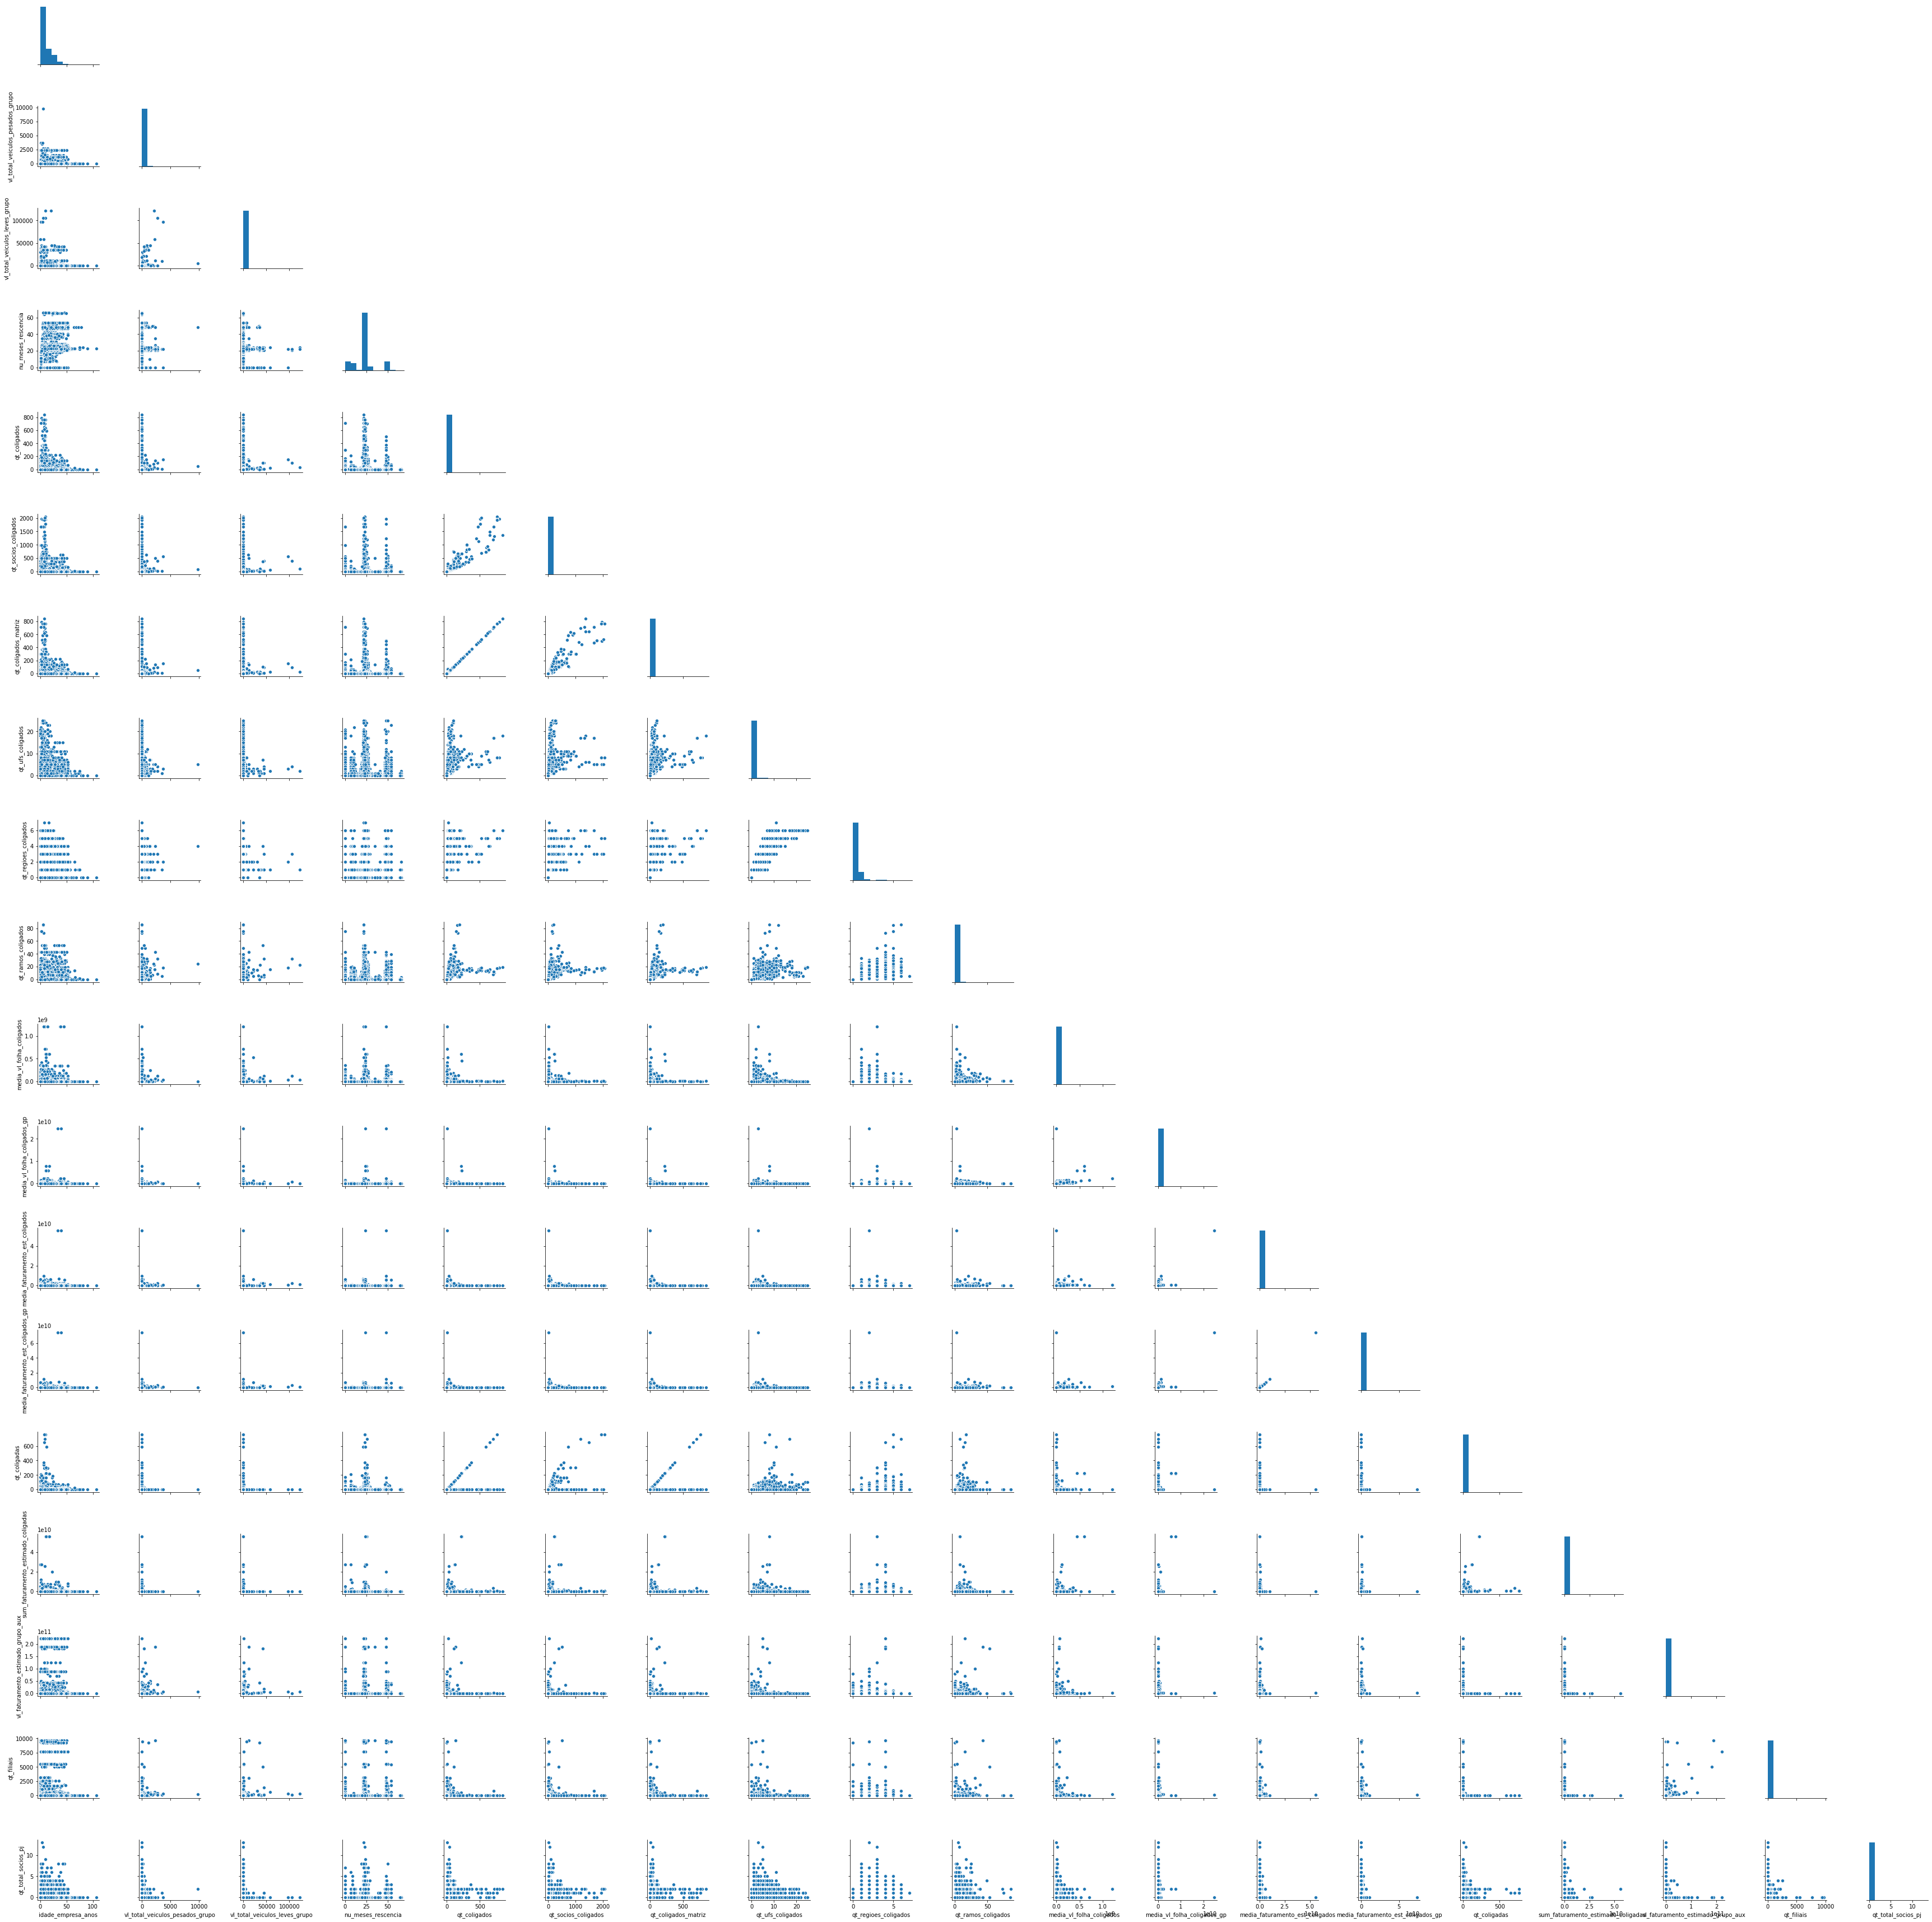

In [ ]:
# Pairplot
g = sns.pairplot(mercado[ls_var_numerica], corner=True)

Os gráficos dos dados numéricos apontam que os dados não aparentam estar normalmente distribuídos, o que deve ser confirmado via teste de hipóteses.

# 3. Análise das Variáveis do Tipo Object

Antes de tratar as variáveis object, vou remover as colunas numéricas fortemente correlacionadas

In [ ]:
# identificar colunas correlacionadas e removê-las
# identificar as colunas
floats = ['float16', 'float32', 'float64']
ls_var_float = list(mercado.select_dtypes(include=floats).columns)
print(len(ls_var_float))

# criar a função para identificar as correlacionadas
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

# aplicar a função ao nível de 90%
corr_features = correlation(mercado[ls_var_float], 0.9)

# lista de variáveis a serem removidas dos conjuntos de dados
print('correlated features: ', len(set(corr_features)) )

# remover as colunas fortemente correlacionadas
mercado.drop(corr_features, axis=1, inplace=True)
portfolio1.drop(corr_features, axis=1, inplace=True)
portfolio2.drop(corr_features, axis=1, inplace=True)
portfolio3.drop(corr_features, axis=1, inplace=True)

18
correlated features:  4


In [ ]:
# variáveis excluídas
corr_features

{'media_faturamento_est_coligados_gp',
 'qt_coligados_matriz',
 'qt_regioes_coligados',
 'qt_socios_coligados'}

Compreender cada variável de forma a determinar o melhor tratamento para ela: one-hot-encoding ou discretização

In [ ]:
ls_cols_obj = [col for col in mercado.columns if mercado[col].dtype == 'O']
ls_cols_obj, len(ls_cols_obj)

(['id',
  'sg_uf',
  'sg_uf_matriz',
  'de_saude_tributaria',
  'de_saude_rescencia',
  'de_nivel_atividade'],
 6)

Optei por one-hot-encoding quando não se desejar estabelecer hierarquia de valores e quando a quantidade de valores únicos não for grande.

one-hot:
* de_saude_tributaria
* de_nivel_atividade
* de_saude_rescencia

manter:
* id
* sg_uf -> será substituída por indicadores sócio-econômicos

remover devido a grande quantidade de valores únicos ou porque seus valores já são interpretáveis em outras colunas:
* sg_uf_matriz

In [ ]:
mercado.drop('sg_uf_matriz', axis=1, inplace=True)
portfolio1.drop('sg_uf_matriz', axis=1, inplace=True)
portfolio2.drop('sg_uf_matriz', axis=1, inplace=True)
portfolio3.drop('sg_uf_matriz', axis=1, inplace=True)

Para fazer o processo de one-hot-encoding será utilizada a bilbioteca Feature Engine

In [ ]:
!pip install -U feature-engine

     |████████████████████████████████| 8.7MB 4.9MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
# lista de colunas que serão tratadas com one hot encoding
ls_cols_ohe = ['de_saude_tributaria', 'de_nivel_atividade', 'de_saude_rescencia']

# quantidade de novas colunas a serem inseridas nos conjuntos de dados
mercado[ls_cols_ohe].nunique()

de_saude_tributaria    6
de_nivel_atividade     3
de_saude_rescencia     4
dtype: int64

In [ ]:
from feature_engine.categorical_encoders import OneHotCategoricalEncoder

ohe_enc = OneHotCategoricalEncoder(
    variables=ls_cols_ohe,
    drop_last=False)

ohe_enc.fit(mercado)

OneHotCategoricalEncoder(drop_last=False, top_categories=None,
                         variables=['de_saude_tributaria', 'de_nivel_atividade',
                                    'de_saude_rescencia'])

In [ ]:
# identificar as top categorias de cada variável
ohe_enc.encoder_dict_

{'de_nivel_atividade': array(['ALTA', 'BAIXA', 'MEDIA'], dtype=object),
 'de_saude_rescencia': array(['ACIMA DE 1 ANO', 'ATE 1 ANO', 'SEM INFORMACAO', 'ATE 6 MESES'],
       dtype=object),
 'de_saude_tributaria': array(['VERDE', 'CINZA', 'AMARELO', 'LARANJA', 'AZUL', 'VERMELHO'],
       dtype=object)}

In [ ]:
# criacao das novas colunas one-hot-encoding
mercado    = ohe_enc.transform(mercado)
portfolio1 = ohe_enc.transform(portfolio1)
portfolio2 = ohe_enc.transform(portfolio2)
portfolio3 = ohe_enc.transform(portfolio3)

In [ ]:
# Alterar variáveis booleanas para binários 1/0
# fl_email       
# fl_telefone    
# fl_rm          
# fl_veiculo   

mercado['fl_email']    = mercado['fl_email'].map({True: 1, False: 0})
portfolio1['fl_email'] = portfolio1['fl_email'].map({True: 1, False: 0})
portfolio2['fl_email'] = portfolio2['fl_email'].map({True: 1, False: 0})
portfolio3['fl_email'] = portfolio3['fl_email'].map({True: 1, False: 0})

mercado['fl_telefone']    = mercado['fl_telefone'].map({True: 1, False: 0})
portfolio1['fl_telefone'] = portfolio1['fl_telefone'].map({True: 1, False: 0})
portfolio2['fl_telefone'] = portfolio2['fl_telefone'].map({True: 1, False: 0})
portfolio3['fl_telefone'] = portfolio3['fl_telefone'].map({True: 1, False: 0})

mercado['fl_rm']    = mercado['fl_rm'].map({True: 1, False: 0})
portfolio1['fl_rm'] = portfolio1['fl_rm'].map({True: 1, False: 0})
portfolio2['fl_rm'] = portfolio2['fl_rm'].map({True: 1, False: 0})
portfolio3['fl_rm'] = portfolio3['fl_rm'].map({True: 1, False: 0})

mercado['fl_veiculo']    = mercado['fl_veiculo'].map({True: 1, False: 0})
portfolio1['fl_veiculo'] = portfolio1['fl_veiculo'].map({True: 1, False: 0})
portfolio2['fl_veiculo'] = portfolio2['fl_veiculo'].map({True: 1, False: 0})
portfolio3['fl_veiculo'] = portfolio3['fl_veiculo'].map({True: 1, False: 0})

In [ ]:
# Perfil dos conjuntos de dados após encerramento desta etapa:
len(mercado.columns), len(portfolio1.columns), len(portfolio2.columns), len(portfolio3.columns)

(34, 34, 34, 34)

# 4. Inclusão de Novos Dados

Serão incluídos indicadores sócio-econômicos em substituição a coluna relativa a unidade da federação. O objetivo é prover ao modelo de machine learning algum sentido no que se refere a variável unidade da federação. Os dados foram obtidos no site do IBGE, tendo como fonte a PNAD de 2019.

In [ ]:
df_ind_socio_eco = pd.read_excel('/content/drive/My Drive/codenation/codeNation/Projeto/data/geolocalizacao/ceb19b2b0f837c9e961f3cc8c52d580a.xls')
df_ind_socio_eco

,UF,Area_Territorial,População_estimada,Densidade_demográfica,Matrículas_ensino_fundamental,IDH_2010,Receitas_realizadas_2017,Despesas_empenhadas_2017,Rendimento_mensal_domiciliar_per_capita_2019,Total_veIculos_2018
0,AC,164123.964,881935,4.47,157646,0.663,6.632883e+06,6.084417e+06,890,277831
1,AL,27843.295,3337357,112.33,490587,0.631,1.195044e+07,1.046063e+07,731,834827
2,AP,142470.762,845731,4.69,136185,0.708,5.396417e+06,4.224464e+06,880,195039
3,AM,1559167.889,4144597,2.23,705007,0.674,1.732846e+07,1.532490e+07,842,883083
4,BA,564760.427,14873064,24.82,2034711,0.660,5.019100e+07,4.557016e+07,913,4139107
5,CE,148894.441,9132078,56.76,1198116,0.682,2.842022e+07,2.460835e+07,942,3148369
6,DF,5760.783,3015268,444.66,377622,0.824,2.381221e+07,2.199046e+07,2686,1812473
7,ES,46074.447,4018650,76.25,502059,0.740,1.968562e+07,1.439234e+07,1477,1936862
8,GO,340203.329,7018354,17.65,877593,0.735,3.788534e+07,2.424838e+07,1306,3909429
9,MA,329642.182,7075181,19.81,1178949,0.639,1.850326e+07,1.762717e+07,636,1696683


In [ ]:
# verificar a existência de valores ausentes
missing_values_table(df_ind_socio_eco)

Your dataframe has 10 columns. There are 0 columns with missing values.



,Missing Values,% of Total Values


In [ ]:
df_ind_socio_eco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 10 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   UF                                            27 non-null     object 
 1   Area_Territorial                              27 non-null     float64
 2   População_estimada                            27 non-null     int64  
 3   Densidade_demográfica                         27 non-null     float64
 4   Matrículas_ensino_fundamental                27 non-null     int64  
 5   IDH_2010                                      27 non-null     float64
 6   Receitas_realizadas_2017                      27 non-null     float64
 7   Despesas_empenhadas_2017                      27 non-null     float64
 8   Rendimento_mensal_domiciliar_per_capita_2019  27 non-null     int64  
 9   Total_veIculos_2018                           27 non-null     int64

In [ ]:
# antes de fazer o join, renomear a coluna UF
df_ind_socio_eco.rename(columns={'UF': 'sg_uf'}, inplace=True)

In [ ]:
# Fazer o join com os demais dataframes
# 1. ajustar o índice dos dataframes para executar o merge
mercado.set_index('sg_uf', inplace=True)
portfolio1.set_index('sg_uf', inplace=True)
portfolio2.set_index('sg_uf', inplace=True)
portfolio3.set_index('sg_uf', inplace=True)
df_ind_socio_eco.set_index('sg_uf', inplace=True)

# 2. executar o join
mercado    = mercado.join(df_ind_socio_eco)
portfolio1 = portfolio1.join(df_ind_socio_eco)
portfolio2 = portfolio2.join(df_ind_socio_eco)
portfolio3 = portfolio3.join(df_ind_socio_eco)

# 3. reajustar o índice do conjunto de dados
mercado.reset_index(inplace=True)
portfolio1.reset_index(inplace=True)
portfolio2.reset_index(inplace=True)
portfolio3.reset_index(inplace=True)

In [ ]:
# amostra do resultado final em todos os conjutos de dados
mercado.head()

,sg_uf,id,idade_empresa_anos,fl_email,fl_telefone,fl_rm,fl_veiculo,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,nu_meses_rescencia,qt_coligados,qt_ufs_coligados,qt_ramos_coligados,media_vl_folha_coligados,media_vl_folha_coligados_gp,media_faturamento_est_coligados,qt_coligadas,sum_faturamento_estimado_coligadas,vl_faturamento_estimado_grupo_aux,qt_filiais,qt_total_socios_pj,de_saude_tributaria_VERDE,de_saude_tributaria_CINZA,de_saude_tributaria_AMARELO,de_saude_tributaria_LARANJA,de_saude_tributaria_AZUL,de_saude_tributaria_VERMELHO,de_nivel_atividade_ALTA,de_nivel_atividade_BAIXA,de_nivel_atividade_MEDIA,de_saude_rescencia_ACIMA DE 1 ANO,de_saude_rescencia_ATE 1 ANO,de_saude_rescencia_SEM INFORMACAO,de_saude_rescencia_ATE 6 MESES,Area_Territorial,População_estimada,Densidade_demográfica,Matrículas_ensino_fundamental,IDH_2010,Receitas_realizadas_2017,Despesas_empenhadas_2017,Rendimento_mensal_domiciliar_per_capita_2019,Total_veIculos_2018
0,AC,5124a4ed965efeccdf43cd402f05d127f5e87fcc2d88f7...,0.742466,1,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,2.100000e+05,0,0.0,0,1,0,0,0,0,0,0,1,0,0,1,0,164123.964,881935,4.47,157646,0.663,6.632883e+06,6.084417e+06,890,277831
1,AC,8a584390e7b2fba5ef33a51b2f8fd63bd202194db3e5ee...,6.912329,1,1,0,0,39.0,390.0,48.0,22.0,5.0,16.0,6.540471e+07,9.020623e+07,1.321859e+09,0.0,0.0,2.227618e+11,7687,0.0,1,0,0,0,0,0,1,0,0,1,0,0,0,164123.964,881935,4.47,157646,0.663,6.632883e+06,6.084417e+06,890,277831
2,AC,140241eb6bdccbf0ba69739cdb9ca1e0bf4e795125aee2...,7.400000,0,1,0,0,0.0,0.0,23.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,2.100000e+05,0,0.0,0,0,0,0,1,0,1,0,0,1,0,0,0,164123.964,881935,4.47,157646,0.663,6.632883e+06,6.084417e+06,890,277831
3,AC,c5e70d47fe82cf519287e51c21d9557f821c74dde25eb2...,33.227397,0,0,0,0,283.0,2134.0,54.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,3.607379e+10,559,0.0,0,0,0,0,0,1,0,0,1,1,0,0,0,164123.964,881935,4.47,157646,0.663,6.632883e+06,6.084417e+06,890,277831
4,AC,2a034ebd67224b1b823422411890c5adb6e954475a232b...,3.345205,1,1,0,0,0.0,0.0,23.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,5.000000e+04,0,0.0,1,0,0,0,0,0,1,0,0,1,0,0,0,164123.964,881935,4.47,157646,0.663,6.632883e+06,6.084417e+06,890,277831


In [ ]:
mercado.tail()

,sg_uf,id,idade_empresa_anos,fl_email,fl_telefone,fl_rm,fl_veiculo,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,nu_meses_rescencia,qt_coligados,qt_ufs_coligados,qt_ramos_coligados,media_vl_folha_coligados,media_vl_folha_coligados_gp,media_faturamento_est_coligados,qt_coligadas,sum_faturamento_estimado_coligadas,vl_faturamento_estimado_grupo_aux,qt_filiais,qt_total_socios_pj,de_saude_tributaria_VERDE,de_saude_tributaria_CINZA,de_saude_tributaria_AMARELO,de_saude_tributaria_LARANJA,de_saude_tributaria_AZUL,de_saude_tributaria_VERMELHO,de_nivel_atividade_ALTA,de_nivel_atividade_BAIXA,de_nivel_atividade_MEDIA,de_saude_rescencia_ACIMA DE 1 ANO,de_saude_rescencia_ATE 1 ANO,de_saude_rescencia_SEM INFORMACAO,de_saude_rescencia_ATE 6 MESES,Area_Territorial,População_estimada,Densidade_demográfica,Matrículas_ensino_fundamental,IDH_2010,Receitas_realizadas_2017,Despesas_empenhadas_2017,Rendimento_mensal_domiciliar_per_capita_2019,Total_veIculos_2018
462293,RO,988f2d2ad310e2ba1c6d03d7c12a80dba75557503c2198...,7.720548,0,0,0,0,0.0,0.0,22.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000e+00,210000.0,0,0.0,1,0,0,0,0,0,0,0,1,1,0,0,0,237765.24,1777225,6.58,269626,0.69,9.122311e+06,7.085530e+06,1136,985047
462294,RO,7217389b17042e97dd2b35899f375aabd40901c90f26b4...,0.687671,1,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000e+00,210000.0,0,0.0,0,1,0,0,0,0,0,1,0,0,0,1,0,237765.24,1777225,6.58,269626,0.69,9.122311e+06,7.085530e+06,1136,985047
462295,RO,a29ac8a2e3a0bd8b806a7d62d135c806de7004dc088485...,16.849315,0,0,0,1,0.0,1.0,23.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000e+00,210000.0,0,0.0,0,0,0,0,1,0,0,1,0,1,0,0,0,237765.24,1777225,6.58,269626,0.69,9.122311e+06,7.085530e+06,1136,985047
462296,RO,84db0f17467cf4f02439e01ade57150b6ac59d9dae53ed...,1.909589,1,0,0,0,0.0,0.0,20.0,190.0,10.0,4.0,338425.352605,393038.636347,919735.440125,190.0,1.738300e+08,432734.4,0,0.0,1,0,0,0,0,0,1,0,0,1,0,0,0,237765.24,1777225,6.58,269626,0.69,9.122311e+06,7.085530e+06,1136,985047
462297,RO,3d43e934e150b86be1e67524f5ba1018b27da9ef25566d...,0.797260,1,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000e+00,210000.0,0,0.0,0,1,0,0,0,0,0,1,0,0,0,1,0,237765.24,1777225,6.58,269626,0.69,9.122311e+06,7.085530e+06,1136,985047


In [ ]:
portfolio1.head()

,sg_uf,id,idade_empresa_anos,fl_email,fl_telefone,fl_rm,fl_veiculo,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,nu_meses_rescencia,qt_coligados,qt_ufs_coligados,qt_ramos_coligados,media_vl_folha_coligados,media_vl_folha_coligados_gp,media_faturamento_est_coligados,qt_coligadas,sum_faturamento_estimado_coligadas,vl_faturamento_estimado_grupo_aux,qt_filiais,qt_total_socios_pj,de_saude_tributaria_VERDE,de_saude_tributaria_CINZA,de_saude_tributaria_AMARELO,de_saude_tributaria_LARANJA,de_saude_tributaria_AZUL,de_saude_tributaria_VERMELHO,de_nivel_atividade_ALTA,de_nivel_atividade_BAIXA,de_nivel_atividade_MEDIA,de_saude_rescencia_ACIMA DE 1 ANO,de_saude_rescencia_ATE 1 ANO,de_saude_rescencia_SEM INFORMACAO,de_saude_rescencia_ATE 6 MESES,Area_Territorial,População_estimada,Densidade_demográfica,Matrículas_ensino_fundamental,IDH_2010,Receitas_realizadas_2017,Despesas_empenhadas_2017,Rendimento_mensal_domiciliar_per_capita_2019,Total_veIculos_2018
0,AC,7f77ee89cfb23a3b235febb461c111e750373a9f036aa8...,4.378082,1,1,0,0,0,0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50000.0,0,0.0,1,0,0,0,0,0,1,0,0,1,0,0,0,164123.964,881935,4.47,157646,0.663,6.632883e+06,6.084417e+06,890,277831
1,AC,c1368c65b5cedc9395e88bfd18cf3713599b6a200ac0c1...,2.580822,1,1,0,0,0,0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50000.0,0,0.0,1,0,0,0,0,0,1,0,0,1,0,0,0,164123.964,881935,4.47,157646,0.663,6.632883e+06,6.084417e+06,890,277831
2,AC,26168a69f1356dbb2de2eb8b600a845e13ee07807614d9...,1.523288,1,1,0,0,0,0,9.0,2.0,1.0,2.0,0.0,0.0,930000.0,2.0,1860000.0,741830.4,0,0.0,1,0,0,0,0,0,1,0,0,0,1,0,0,164123.964,881935,4.47,157646,0.663,6.632883e+06,6.084417e+06,890,277831
3,AC,bee92f7d793051acada2100e920a7b77b97acb38340de4...,7.638356,1,0,0,0,0,0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,210000.0,0,0.0,0,0,0,0,1,0,1,0,0,1,0,0,0,164123.964,881935,4.47,157646,0.663,6.632883e+06,6.084417e+06,890,277831
4,AC,1c888d3335e500b8441915aed107ac68fbd05da1b6ede3...,9.673973,1,1,0,0,0,0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2410948.8,0,0.0,0,0,0,0,1,0,1,0,0,1,0,0,0,164123.964,881935,4.47,157646,0.663,6.632883e+06,6.084417e+06,890,277831


In [ ]:
portfolio1.tail()

,sg_uf,id,idade_empresa_anos,fl_email,fl_telefone,fl_rm,fl_veiculo,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,nu_meses_rescencia,qt_coligados,qt_ufs_coligados,qt_ramos_coligados,media_vl_folha_coligados,media_vl_folha_coligados_gp,media_faturamento_est_coligados,qt_coligadas,sum_faturamento_estimado_coligadas,vl_faturamento_estimado_grupo_aux,qt_filiais,qt_total_socios_pj,de_saude_tributaria_VERDE,de_saude_tributaria_CINZA,de_saude_tributaria_AMARELO,de_saude_tributaria_LARANJA,de_saude_tributaria_AZUL,de_saude_tributaria_VERMELHO,de_nivel_atividade_ALTA,de_nivel_atividade_BAIXA,de_nivel_atividade_MEDIA,de_saude_rescencia_ACIMA DE 1 ANO,de_saude_rescencia_ATE 1 ANO,de_saude_rescencia_SEM INFORMACAO,de_saude_rescencia_ATE 6 MESES,Area_Territorial,População_estimada,Densidade_demográfica,Matrículas_ensino_fundamental,IDH_2010,Receitas_realizadas_2017,Despesas_empenhadas_2017,Rendimento_mensal_domiciliar_per_capita_2019,Total_veIculos_2018
550,RO,bb681d794aa3c76ba31c8793f137d9283574753646719b...,8.232877,0,1,0,0,0,0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,210000.0,0,0.0,0,0,0,0,1,0,0,0,1,1,0,0,0,237765.24,1777225,6.58,269626,0.69,9.122311e+06,7.085530e+06,1136,985047
551,RO,40320bac6233111923db1e891c4e192f7281fdfedaaf10...,32.473973,0,1,0,1,0,1,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,210000.0,0,0.0,0,0,0,0,1,0,0,0,1,1,0,0,0,237765.24,1777225,6.58,269626,0.69,9.122311e+06,7.085530e+06,1136,985047
552,RO,9dd67ab3a8a24aa2798393dd4a36c16bb03d0b0f613f2d...,5.093151,0,1,0,0,0,0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,210000.0,0,0.0,0,0,1,0,0,0,0,0,1,1,0,0,0,237765.24,1777225,6.58,269626,0.69,9.122311e+06,7.085530e+06,1136,985047
553,RO,5c1f7c821363f80755976616bd3b789c76d3b60021ef84...,21.158904,1,1,0,0,0,0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,185457.6,0,0.0,0,0,0,1,0,0,0,1,0,1,0,0,0,237765.24,1777225,6.58,269626,0.69,9.122311e+06,7.085530e+06,1136,985047
554,RO,0bb480303fa97577b8e25ae2c4ae8a2f04bff4095dc216...,1.857534,0,1,0,0,0,0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,210000.0,0,0.0,1,0,0,0,0,0,0,0,1,1,0,0,0,237765.24,1777225,6.58,269626,0.69,9.122311e+06,7.085530e+06,1136,985047


In [ ]:
portfolio2.head()

,sg_uf,id,idade_empresa_anos,fl_email,fl_telefone,fl_rm,fl_veiculo,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,nu_meses_rescencia,qt_coligados,qt_ufs_coligados,qt_ramos_coligados,media_vl_folha_coligados,media_vl_folha_coligados_gp,media_faturamento_est_coligados,qt_coligadas,sum_faturamento_estimado_coligadas,vl_faturamento_estimado_grupo_aux,qt_filiais,qt_total_socios_pj,de_saude_tributaria_VERDE,de_saude_tributaria_CINZA,de_saude_tributaria_AMARELO,de_saude_tributaria_LARANJA,de_saude_tributaria_AZUL,de_saude_tributaria_VERMELHO,de_nivel_atividade_ALTA,de_nivel_atividade_BAIXA,de_nivel_atividade_MEDIA,de_saude_rescencia_ACIMA DE 1 ANO,de_saude_rescencia_ATE 1 ANO,de_saude_rescencia_SEM INFORMACAO,de_saude_rescencia_ATE 6 MESES,Area_Territorial,População_estimada,Densidade_demográfica,Matrículas_ensino_fundamental,IDH_2010,Receitas_realizadas_2017,Despesas_empenhadas_2017,Rendimento_mensal_domiciliar_per_capita_2019,Total_veIculos_2018
0,AC,09e95c1a84049001d086470a8f320a19b076f955a89122...,11.243836,1,1,0,1,0.0,4.0,23.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.274872e+08,0,0.0,1,0,0,0,0,0,1,0,0,1,0,0,0,164123.964,881935,4.47,157646,0.663,6.632883e+06,6.084417e+06,890,277831
1,AC,77ed856930ed9c2b5348eca951d152b5655c98af3bb446...,20.030137,1,1,0,1,3.0,4.0,48.0,1.0,1.0,1.0,0.0,0.0,930000.0,1.0,930000.0,1.967911e+07,7,0.0,1,0,0,0,0,0,1,0,0,1,0,0,0,164123.964,881935,4.47,157646,0.663,6.632883e+06,6.084417e+06,890,277831
2,AC,a3d925e824b630c10d7bc6d3f5104656d0e43db7665209...,17.369863,0,1,0,1,0.0,7.0,23.0,2.0,2.0,2.0,0.0,0.0,210000.0,2.0,420000.0,1.973456e+07,1,0.0,0,0,0,1,0,0,1,0,0,1,0,0,0,164123.964,881935,4.47,157646,0.663,6.632883e+06,6.084417e+06,890,277831
3,AC,e3f48cd54034c370927e5339dab813eb8945eb15a7e6c0...,43.800000,1,1,0,1,15.0,67.0,23.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.077660e+09,32,0.0,1,0,0,0,0,0,1,0,0,1,0,0,0,164123.964,881935,4.47,157646,0.663,6.632883e+06,6.084417e+06,890,277831
4,AC,0f023a031a0bea745f7ee36134edaac5e972d27f4ff38d...,43.635616,1,1,0,1,2.0,10.0,23.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.371871e+08,0,0.0,1,0,0,0,0,0,1,0,0,1,0,0,0,164123.964,881935,4.47,157646,0.663,6.632883e+06,6.084417e+06,890,277831


In [ ]:
portfolio2.tail()

,sg_uf,id,idade_empresa_anos,fl_email,fl_telefone,fl_rm,fl_veiculo,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,nu_meses_rescencia,qt_coligados,qt_ufs_coligados,qt_ramos_coligados,media_vl_folha_coligados,media_vl_folha_coligados_gp,media_faturamento_est_coligados,qt_coligadas,sum_faturamento_estimado_coligadas,vl_faturamento_estimado_grupo_aux,qt_filiais,qt_total_socios_pj,de_saude_tributaria_VERDE,de_saude_tributaria_CINZA,de_saude_tributaria_AMARELO,de_saude_tributaria_LARANJA,de_saude_tributaria_AZUL,de_saude_tributaria_VERMELHO,de_nivel_atividade_ALTA,de_nivel_atividade_BAIXA,de_nivel_atividade_MEDIA,de_saude_rescencia_ACIMA DE 1 ANO,de_saude_rescencia_ATE 1 ANO,de_saude_rescencia_SEM INFORMACAO,de_saude_rescencia_ATE 6 MESES,Area_Territorial,População_estimada,Densidade_demográfica,Matrículas_ensino_fundamental,IDH_2010,Receitas_realizadas_2017,Despesas_empenhadas_2017,Rendimento_mensal_domiciliar_per_capita_2019,Total_veIculos_2018
561,RO,b55dfb2c1e522664ef43526c17a6b237b5a1a81b4e4793...,24.578082,1,1,1,1,4.0,18.0,26.0,1.0,1.0,1.0,61819.199219,61819.199219,185457.59375,1.0,185457.59375,46281976.0,8,0.0,1,0,0,0,0,0,1,0,0,1,0,0,0,237765.24,1777225,6.58,269626,0.69,9.122311e+06,7.085530e+06,1136,985047
562,RO,b604d90e926ace74d8e34300a864c85bdd25da46c7935b...,26.221918,1,1,0,1,0.0,4.0,23.0,1.0,1.0,1.0,0.000000,0.000000,210000.00000,1.0,210000.00000,40130964.0,0,0.0,1,0,0,0,0,0,1,0,0,1,0,0,0,237765.24,1777225,6.58,269626,0.69,9.122311e+06,7.085530e+06,1136,985047
563,RO,723182eac1124c7fe4affa3001e1170734fe0e2530ea08...,11.882192,1,1,0,0,0.0,0.0,25.0,-1.0,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.00000,13033548.0,0,0.0,0,0,0,0,1,0,0,0,1,1,0,0,0,237765.24,1777225,6.58,269626,0.69,9.122311e+06,7.085530e+06,1136,985047
564,RO,2d612892c9dbfbaa6900992bc7ef187159dd97afe55d9b...,24.109589,0,0,0,1,0.0,1.0,23.0,1.0,1.0,1.0,0.000000,0.000000,210000.00000,1.0,210000.00000,42861310.0,0,0.0,0,0,0,0,0,1,0,0,1,1,0,0,0,237765.24,1777225,6.58,269626,0.69,9.122311e+06,7.085530e+06,1136,985047
565,RO,31438f752b4a846638c0acd98c3078d7e1ee83204e0388...,18.580822,1,1,0,1,2.0,19.0,23.0,-1.0,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.00000,108877850.0,10,0.0,1,0,0,0,0,0,1,0,0,1,0,0,0,237765.24,1777225,6.58,269626,0.69,9.122311e+06,7.085530e+06,1136,985047


In [ ]:
portfolio3.head()

,sg_uf,id,idade_empresa_anos,fl_email,fl_telefone,fl_rm,fl_veiculo,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,nu_meses_rescencia,qt_coligados,qt_ufs_coligados,qt_ramos_coligados,media_vl_folha_coligados,media_vl_folha_coligados_gp,media_faturamento_est_coligados,qt_coligadas,sum_faturamento_estimado_coligadas,vl_faturamento_estimado_grupo_aux,qt_filiais,qt_total_socios_pj,de_saude_tributaria_VERDE,de_saude_tributaria_CINZA,de_saude_tributaria_AMARELO,de_saude_tributaria_LARANJA,de_saude_tributaria_AZUL,de_saude_tributaria_VERMELHO,de_nivel_atividade_ALTA,de_nivel_atividade_BAIXA,de_nivel_atividade_MEDIA,de_saude_rescencia_ACIMA DE 1 ANO,de_saude_rescencia_ATE 1 ANO,de_saude_rescencia_SEM INFORMACAO,de_saude_rescencia_ATE 6 MESES,Area_Territorial,População_estimada,Densidade_demográfica,Matrículas_ensino_fundamental,IDH_2010,Receitas_realizadas_2017,Despesas_empenhadas_2017,Rendimento_mensal_domiciliar_per_capita_2019,Total_veIculos_2018
0,AC,7e46107cb32e64f7f90ec16372d29f205f0d9781140308...,8.446575,1,1,0,1,1.0,11.0,23.0,3.0,1.0,1.0,7500729.5,7500729.5,6390608.0,3.0,19171824.0,35185428.0,0,0.0,1,0,0,0,0,0,1,0,0,1,0,0,0,164123.964,881935,4.47,157646,0.663,6.632883e+06,6.084417e+06,890,277831
1,AC,e4fec97ff58e794ece4466230b5cad71486bd1021946fb...,29.654795,0,0,0,1,4.0,3.0,23.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,128738480.0,1,0.0,1,0,0,0,0,0,1,0,0,1,0,0,0,164123.964,881935,4.47,157646,0.663,6.632883e+06,6.084417e+06,890,277831
2,AC,8cc6434ef28ae70191dee5ede8f16fea7acb10020a4b46...,43.800000,1,1,0,1,0.0,24.0,23.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,253716300.0,0,0.0,0,0,0,0,1,0,1,0,0,1,0,0,0,164123.964,881935,4.47,157646,0.663,6.632883e+06,6.084417e+06,890,277831
3,AC,892c36058797296b7f619a6a19651e5a3bb5e739d42bfb...,7.827397,0,1,0,1,13.0,7.0,21.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22460976.0,0,0.0,1,0,0,0,0,0,1,0,0,1,0,0,0,164123.964,881935,4.47,157646,0.663,6.632883e+06,6.084417e+06,890,277831
4,AC,504fbe45998bfe23a744e7ca7b6c852d0cdb12d511c68c...,25.550685,0,0,0,1,6.0,7.0,23.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,147597280.0,1,0.0,1,0,0,0,0,0,1,0,0,1,0,0,0,164123.964,881935,4.47,157646,0.663,6.632883e+06,6.084417e+06,890,277831


In [ ]:
portfolio3.tail()

,sg_uf,id,idade_empresa_anos,fl_email,fl_telefone,fl_rm,fl_veiculo,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,nu_meses_rescencia,qt_coligados,qt_ufs_coligados,qt_ramos_coligados,media_vl_folha_coligados,media_vl_folha_coligados_gp,media_faturamento_est_coligados,qt_coligadas,sum_faturamento_estimado_coligadas,vl_faturamento_estimado_grupo_aux,qt_filiais,qt_total_socios_pj,de_saude_tributaria_VERDE,de_saude_tributaria_CINZA,de_saude_tributaria_AMARELO,de_saude_tributaria_LARANJA,de_saude_tributaria_AZUL,de_saude_tributaria_VERMELHO,de_nivel_atividade_ALTA,de_nivel_atividade_BAIXA,de_nivel_atividade_MEDIA,de_saude_rescencia_ACIMA DE 1 ANO,de_saude_rescencia_ATE 1 ANO,de_saude_rescencia_SEM INFORMACAO,de_saude_rescencia_ATE 6 MESES,Area_Territorial,População_estimada,Densidade_demográfica,Matrículas_ensino_fundamental,IDH_2010,Receitas_realizadas_2017,Despesas_empenhadas_2017,Rendimento_mensal_domiciliar_per_capita_2019,Total_veIculos_2018
260,RO,22225afe6bb718a447747d7ae1cd29c8e1e8071f358ac0...,37.734247,1,1,0,1,1.0,7.0,23.0,-1.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000,0.0,0.000000e+00,68258700.0,8,0.0,1,0,0,0,0,0,1,0,0,1,0,0,0,237765.24,1777225,6.58,269626,0.69,9.122311e+06,7.085530e+06,1136,985047
261,RO,b604d90e926ace74d8e34300a864c85bdd25da46c7935b...,26.221918,1,1,0,1,0.0,4.0,23.0,1.0,1.0,1.0,0.000000e+00,0.000000e+00,210000.000,1.0,2.100000e+05,40130964.0,0,0.0,1,0,0,0,0,0,1,0,0,1,0,0,0,237765.24,1777225,6.58,269626,0.69,9.122311e+06,7.085530e+06,1136,985047
262,RO,80f32ad2298718d2214f5d10b3aff79cd4f12f58aefe31...,9.835616,1,1,0,1,16.0,33.0,23.0,-1.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000,0.0,0.000000e+00,665364540.0,9,0.0,1,0,0,0,0,0,1,0,0,1,0,0,0,237765.24,1777225,6.58,269626,0.69,9.122311e+06,7.085530e+06,1136,985047
263,RO,2d612892c9dbfbaa6900992bc7ef187159dd97afe55d9b...,24.109589,0,0,0,1,0.0,1.0,23.0,1.0,1.0,1.0,0.000000e+00,0.000000e+00,210000.000,1.0,2.100000e+05,42861310.0,0,0.0,0,0,0,0,0,1,0,0,1,1,0,0,0,237765.24,1777225,6.58,269626,0.69,9.122311e+06,7.085530e+06,1136,985047
264,RO,b6966d868fb7976f993aca02fb667c9ae8f5ebf4d2e033...,18.980822,1,1,0,0,0.0,0.0,23.0,3.0,2.0,3.0,2.088115e+06,2.617013e+06,4873413.625,3.0,1.462024e+07,23903424.0,0,0.0,1,0,0,0,0,0,1,0,0,1,0,0,0,237765.24,1777225,6.58,269626,0.69,9.122311e+06,7.085530e+06,1136,985047


In [ ]:
# identificar colunas com valores duplicados

def getDuplicateColumns(df):
  # source: https://thispointer.com/how-to-find-drop-duplicate-columns-in-a-dataframe-python-pandas/
    '''
    Get a list of duplicate columns.
    It will iterate over all the columns in dataframe and find the columns whose contents are duplicate.
    :param df: Dataframe object
    :return: List of columns whose contents are duplicates.
    '''
    duplicateColumnNames = set()
    # Iterate over all the columns in dataframe
    for x in range(df.shape[1]):
        # Select column at xth index.
        col = df.iloc[:, x]
        # Iterate over all the columns in DataFrame from (x+1)th index till end
        for y in range(x + 1, df.shape[1]):
            # Select column at yth index.
            otherCol = df.iloc[:, y]
            # Check if two columns at x 7 y index are equal
            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])
 
    return list(duplicateColumnNames)

lista_cols_duplicadas = []
lista_cols_duplicadas = getDuplicateColumns(mercado)
lista_cols_duplicadas

[]

In [ ]:
# tipos de dados
mercado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462298 entries, 0 to 462297
Data columns (total 43 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   sg_uf                                         462298 non-null  object 
 1   id                                            462298 non-null  object 
 2   idade_empresa_anos                            462298 non-null  float64
 3   fl_email                                      462298 non-null  int64  
 4   fl_telefone                                   462298 non-null  int64  
 5   fl_rm                                         462298 non-null  int64  
 6   fl_veiculo                                    462298 non-null  int64  
 7   vl_total_veiculos_pesados_grupo               462298 non-null  float64
 8   vl_total_veiculos_leves_grupo                 462298 non-null  float64
 9   nu_meses_rescencia                            46

# 5. Preparação dos Dados para Machine Learning

In [ ]:
# Gerar lista de variáveis numéricas
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
ls_var_numerica = list(mercado.select_dtypes(include=numerics).columns)
len(ls_var_numerica)

41

Vou fazer o teste Shapiro-Wilk em cada variável numérica para identificar se ela está numa distribuição normal.

In [ ]:
import scipy.stats as sct

ls_var_normal = []

for col in ls_var_numerica:
    shapiro_test = sct.shapiro(mercado[col])

    if shapiro_test[1] > 0.05:
        ls_var_normal.append(col)

len(ls_var_normal)

/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


0

O teste estatístico indicou que todas as variáveis numéricas não seguem distribuição normal. Estes resultados confirmam o que foi identificado na análise exploratória dos dados.

In [ ]:
# utilizar o min_max_scaler para faciliar o trabalho do K-Means, importante quando as 
# variáveis não são normalmente distribuídas

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(mercado[ls_var_numerica])

mercado[ls_var_numerica]    = scaler.transform(mercado[ls_var_numerica])
portfolio1[ls_var_numerica] = scaler.transform(portfolio1[ls_var_numerica])
portfolio2[ls_var_numerica] = scaler.transform(portfolio2[ls_var_numerica])
portfolio3[ls_var_numerica] = scaler.transform(portfolio3[ls_var_numerica])

In [ ]:
# salvar os dados em disco para continuidade em outro momento
mercado.to_csv('mercado.csv', index=False)
portfolio1.to_csv('portfolio1.csv', index=False)
portfolio2.to_csv('portfolio2.csv', index=False)
portfolio3.to_csv('portfolio3.csv', index=False)

# salvar o objeto scaler
import joblib
joblib.dump(scaler, 'scaler')

print('Dados gravados em disco')

Dados gravados em disco


# 6. K-Means

In [ ]:
# recarregar os dados
from google.colab import drive
drive.mount('/content/drive/')

In [ ]:
import numpy  as np
import pandas as pd

mercado    = pd.read_csv('/content/drive/My Drive/codenation/codeNation/Projeto/data/mercado.csv')
portfolio1 = pd.read_csv('/content/drive/My Drive/codenation/codeNation/Projeto/data/portfolio1.csv')
portfolio2 = pd.read_csv('/content/drive/My Drive/codenation/codeNation/Projeto/data/portfolio2.csv')
portfolio3 = pd.read_csv('/content/drive/My Drive/codenation/codeNation/Projeto/data/portfolio3.csv')

Para trabalhar com o K-Means, segui as orientações no artigo https://medium.com/@jangelojr/identification-of-the-ideal-number-of-clusters-5182b832ebcd

In [ ]:
ls_k = list(range(2, 7))
print(ls_k)

[2, 3, 4, 5, 6]


In [ ]:
%%time
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X = mercado.drop(['sg_uf', 'id'], axis=1)

# treinar vários modelos k-Means e armazená-los em lista
kmeans_per_k = [KMeans(n_clusters=k, init = 'random', n_init = 50, algorithm = 'full', 
                       random_state=42).fit(X) for k in range(2, 7)]

CPU times: user 10min 43s, sys: 5min 8s, total: 15min 51s
Wall time: 8min 16s


In [ ]:
# criar lista com valores da inércia a partir da lista de modelos
inercias = [model.inertia_ for model in kmeans_per_k]
print(inercias)

[1358132.8361185219, 1186148.2047933848, 1054780.3187567107, 985302.8357858387, 936759.257244082]


In [ ]:
%%time
# criar lista para valores da silhouete score a partir da lista de modelos
silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_per_k[1:]]
print(silhouette_scores)

[0.17617016508611885, 0.1944409632648087, 0.1982862666400809, 0.19081524934609778]
CPU times: user 4h 10min 29s, sys: 11min 30s, total: 4h 21min 59s
Wall time: 3h 18min 2s


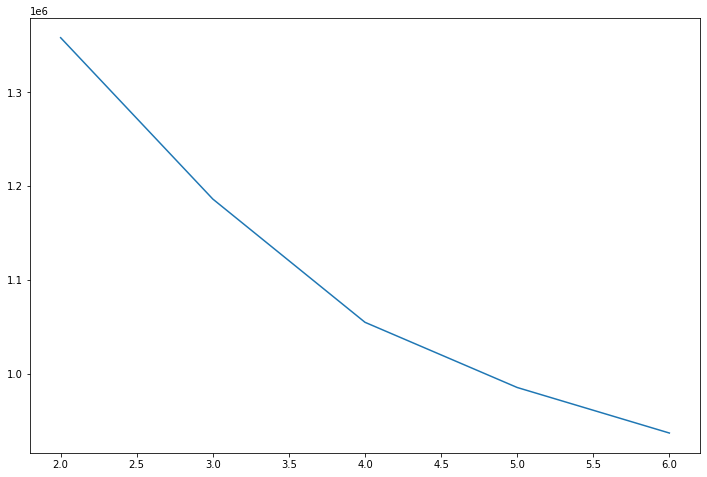

In [ ]:
# análise das inércias (curva de elbow)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
ax = sns.lineplot(x=range(2,7), y=inercias)

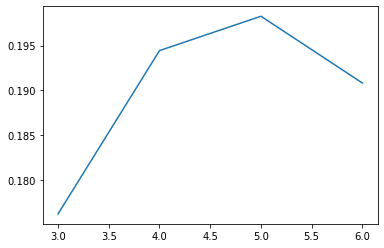

In [ ]:
# avaliação do silhouete score
ax = sns.lineplot(x=range(3,7), y=silhouette_scores)

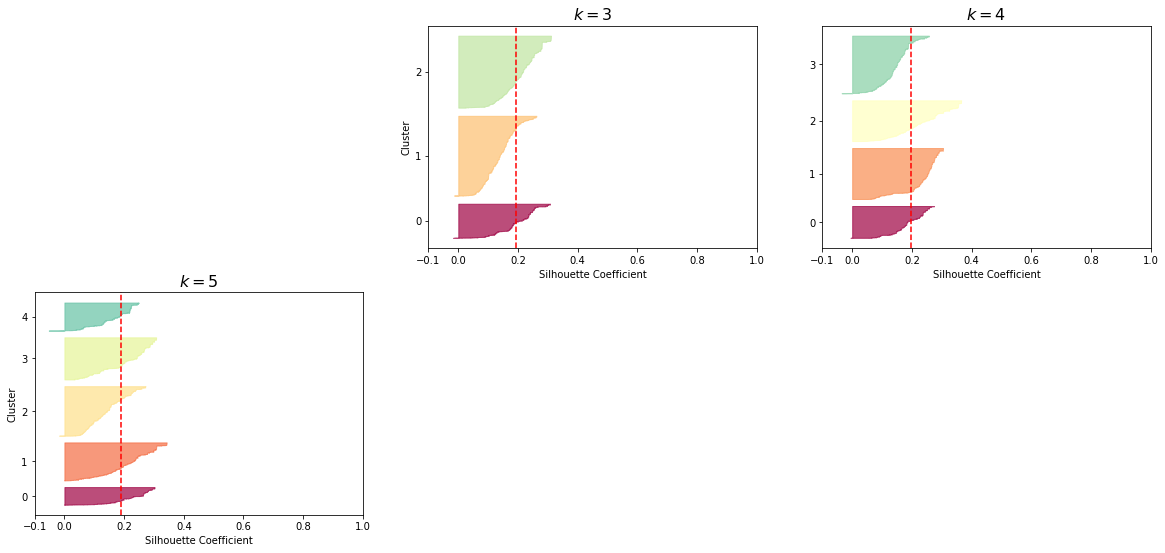

CPU times: user 3h 6min 30s, sys: 8min 38s, total: 3h 15min 8s
Wall time: 2h 27min 19s


In [ ]:
%%time
# comparar resultado com diagrama das facas
from matplotlib.ticker import FixedLocator, FixedFormatter
from sklearn.metrics import silhouette_samples
import matplotlib as mpl

plt.figure(figsize=(20, 9))

for k in (3, 4, 5):
    plt.subplot(2, 3, k - 1)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (3,4,5):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

A altura das facas nos gráficos está mais harmoniosa quando K=4.